In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as go
import os

In [2]:
df_ch4 = pd.read_csv('ch4_mm_gl.csv',header=45)
df_co2 = pd.read_csv('co2_mm_mlo.csv',header=40)
df_n2o = pd.read_csv('n2o_mm_gl.csv',header=45)
df_sf6 = pd.read_csv('sf6_mm_gl.csv',header=45)

# Question 1 


- nombre d'observations = 499
- période = 1983 to 2025
- 7 parametres non conserver

In [3]:
display(df_ch4)
print(df_ch4.columns)

year  month   decimal  average  average_unc    trend  trend_unc
0    1983      7  1983.542  1625.96         2.19  1635.15       1.42
1    1983      8  1983.625  1628.05         2.72  1635.64       1.36
2    1983      9  1983.708  1638.42         2.16  1636.19       1.29
3    1983     10  1983.792  1644.81         1.40  1636.81       1.21
4    1983     11  1983.875  1642.60         0.71  1637.49       1.12
..    ...    ...       ...      ...          ...      ...        ...
494  2024      9  2024.708  1935.67        -9.99  1931.99      -9.99
495  2024     10  2024.792  1941.58        -9.99  1932.75      -9.99
496  2024     11  2024.875  1940.44        -9.99  1933.49      -9.99
497  2024     12  2024.958  1937.52        -9.99  1934.23      -9.99
498  2025      1  2025.042  1935.33        -9.99  1934.96      -9.99

[499 rows x 7 columns]

Index(['year', 'month', 'decimal', 'average', 'average_unc', 'trend',
       'trend_unc'],
      dtype='object')


# Question 2

In [4]:
df_ch4_q2 = df_ch4[['month', 'average']]
display(df_ch4_q2)



month  average
0        7  1625.96
1        8  1628.05
2        9  1638.42
3       10  1644.81
4       11  1642.60
..     ...      ...
494      9  1935.67
495     10  1941.58
496     11  1940.44
497     12  1937.52
498      1  1935.33

[499 rows x 2 columns]

# Question 3

# Question 4

V1 :

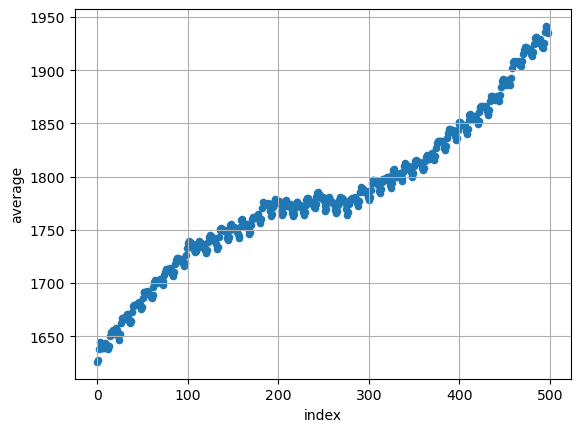

In [5]:
df_ch4.reset_index().plot.scatter(x='index',y='average')
plt.grid(True)

V2 :

In [6]:
def scatterplot_graphique(dataframe,message):
    f = sns.scatterplot(data=dataframe.reset_index(), x="index", y="average", hue="month",legend="full")
    plt.grid(True)
    plt.title(message)

je prefère la version 2...

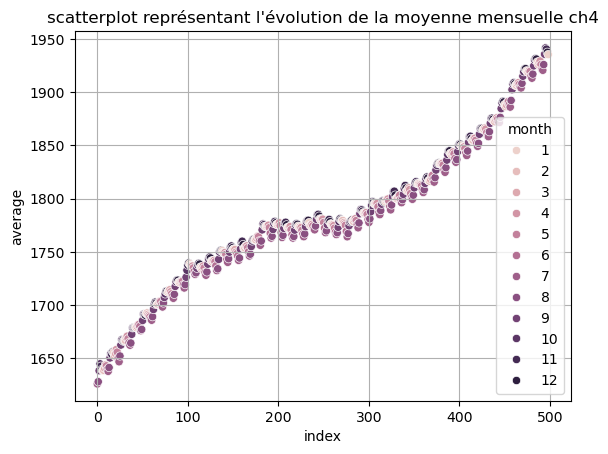

In [7]:
scatterplot_graphique(df_ch4,"scatterplot représentant l'évolution de la moyenne mensuelle ch4")

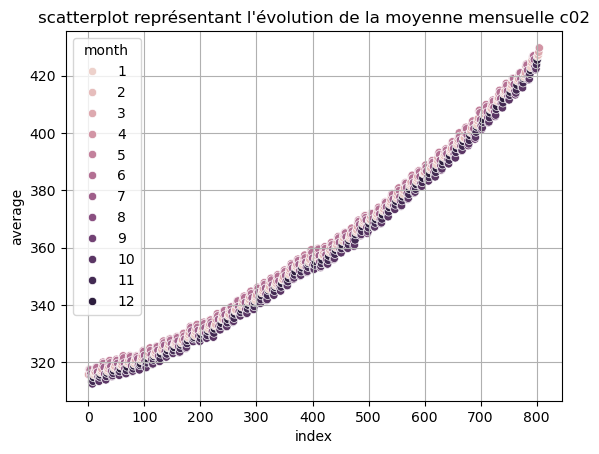

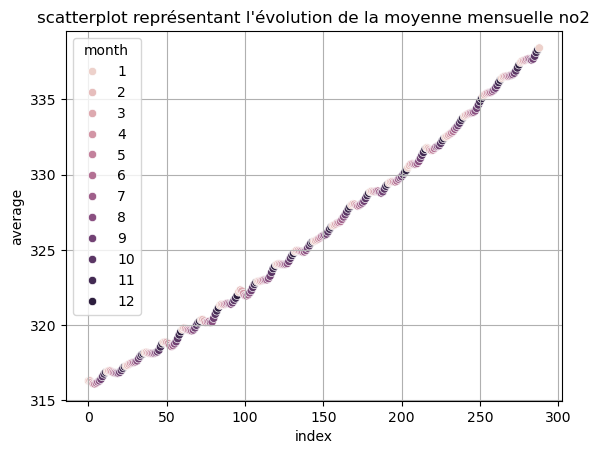

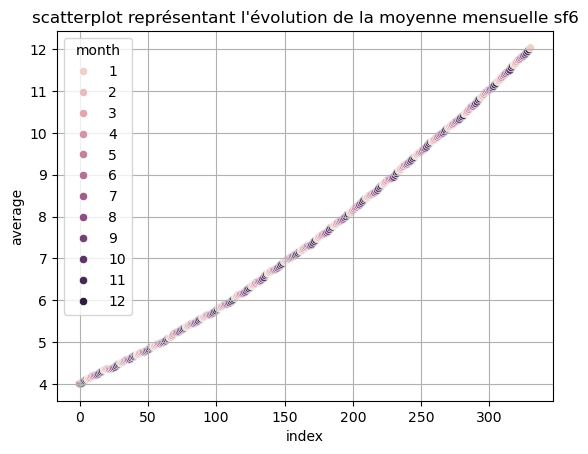

In [8]:
df_co2_q4 = df_co2
df_co2_q4 = df_co2_q4[['month', 'average']]
plt.figure()
scatterplot_graphique(df_co2_q4,"scatterplot représentant l'évolution de la moyenne mensuelle c02")

df_n2o_q4 = df_n2o
df_n2o_q4 = df_n2o_q4[['month', 'average']]
plt.figure()
scatterplot_graphique(df_n2o_q4,"scatterplot représentant l'évolution de la moyenne mensuelle no2")

df_sf6_q4 = df_sf6
df_sf6_q4 = df_sf6_q4[['month', 'average']]
plt.figure()
scatterplot_graphique(df_sf6_q4,"scatterplot représentant l'évolution de la moyenne mensuelle sf6")



ch4 et no2 semble avoir des variations saisoniere du a l'epaisseur de la courbe.

# Question 5

### FONCTIONS

In [9]:
def moyenne_mobile_ordre_6(dataframe):
    window_size = 6
    smoothed_values = []
    smoothed_months = []

    for t in range(window_size, len(dataframe) - window_size):
        window = dataframe['average'].iloc[t - window_size : t + window_size + 1].values

        weighted_sum = 0.5 * window[0] + sum(window[1:-1]) + 0.5 * window[-1]
        smoothed_value = weighted_sum / 12

        smoothed_months.append(dataframe['month'].iloc[t])
        smoothed_values.append(smoothed_value)

    df_smoothed = pd.DataFrame({'month': smoothed_months, 'average_smoothed' : smoothed_values})
    return df_smoothed


In [10]:
def affichage_moyenne_mobile_ordre_6(dataframe,smoothed_dataframe,y_label): 
    sns.lineplot(data=dataframe.reset_index(), x="index", y="average", label="Original")
    sns.lineplot(data=smoothed_dataframe.reset_index(), x="index", y="average_smoothed", label="Moyenne Mobile (ordre 6)")
    plt.grid(True)
    plt.title("Lissage par moyenne mobile centrée (ordre 6)")
    plt.xlabel("index")
    plt.ylabel(y_label + " moyen")
    plt.legend()
    plt.show()

In [11]:
def serie_residuelle_vector(dataframe,smoothed_dataframe,offset):
    x_t = dataframe['average'].iloc[offset : -offset].to_numpy()
    x_t_smoothed = smoothed_dataframe['average_smoothed'].to_numpy()
    S_t = x_t - x_t_smoothed
    months = dataframe['month'].iloc[offset : -offset].to_numpy()
    df_residuelle = pd.DataFrame({'month' : months, 'residual' : S_t})
    return df_residuelle



In [12]:
def affichage_serie_residuelle(dataframe_residuelle,y_label):
    sns.lineplot(data=dataframe_residuelle.reset_index(),x="index",y="residual",label="residuelle")
    plt.grid(True)
    plt.title("Serie residuelle")
    plt.xlabel("index")
    plt.ylabel(y_label + " residuelle")
    plt.legend()
    plt.show()



In [13]:
def coefficients_mensuels(dataframe, dataframe_residuelle, offset):
    months = dataframe['month'].iloc[offset : -offset].to_numpy()  
    dataframe_residuelle['month'] = months
    coefficients = dataframe_residuelle.groupby('month')['residual'].mean().sort_index()
    return coefficients



In [14]:
def affichage_coefficients_mensuels(serie_coefficient,y_label):
    dataframe_coefficient = serie_coefficient.reset_index()
    dataframe_coefficient.columns = ['month','coefficient']
    dataframe_coefficient['month'] = pd.to_numeric(dataframe_coefficient['month'], errors='coerce')
    sns.barplot(data=dataframe_coefficient,x="month",y="coefficient")
    plt.grid(True)
    plt.title("coefficients mensuels")
    plt.xlabel("month")
    plt.ylabel(y_label + " coefficients mensuels")
    plt.xticks(ticks=range(0, 12), labels=['Jan', 'Fév', 'Mar', 'Avr', 'Mai', 'Juin', 'Juil', 'Août', 'Sep', 'Oct', 'Nov', 'Déc'])
    plt.show()


In [15]:
def centrer_coefficient_mensuels(serie_coefficients_mensuels):
    moyenne = serie_coefficients_mensuels.mean()
    coefficients_centrer = serie_coefficients_mensuels - moyenne
    return coefficients_centrer


In [16]:
def affichage_centrer_coefficient_mensuels(serie_coefficients_mensuels,y_label):
    dataframe_coefficient_mensuels = serie_coefficients_mensuels.reset_index()
    dataframe_coefficient_mensuels.columns = ['month','coefficient']
    dataframe_coefficient_mensuels['month'] = pd.to_numeric(dataframe_coefficient_mensuels['month'], errors='coerce')
    sns.barplot(data=dataframe_coefficient_mensuels,x="month",y="coefficient")
    plt.grid(True)
    plt.title("coefficients mensuels centrer")
    plt.xlabel("month")
    plt.ylabel(y_label + " coefficients mensuels centrer")
    plt.xticks(ticks=range(0, 12), labels=['Jan', 'Fév', 'Mar', 'Avr', 'Mai', 'Juin', 'Juil', 'Août', 'Sep', 'Oct', 'Nov', 'Déc'])
    plt.show()

In [17]:
def correction_variation_saisoniere(dataframe, serie_coefficient_mensuel):
    dataframe_copy = dataframe.copy()
    dataframe_copy['coefficient'] = dataframe_copy['month'].map(serie_coefficient_mensuel)
    dataframe_copy['corrigee'] = dataframe_copy['average'] - dataframe_copy['coefficient']
    return dataframe_copy

In [18]:
def afficher_correction_variation_saisoniere(dataframe, y_label):
    sns.lineplot(data=dataframe.reset_index(), x="index", y="average", label="Original")
    sns.lineplot(data=dataframe.reset_index(), x="index", y="corrigee", label="Corrigee")
    plt.grid(True)
    plt.title("Correction des variations saisonnières")
    plt.xlabel("Index temporel")
    plt.ylabel(y_label + " moyen")
    plt.legend()
    plt.tight_layout()
    plt.show()

In [19]:
def regression_corrige_moindres_carres(dataframe):
    dataframe = dataframe.reset_index(drop=True)
    x = dataframe.index.to_numpy()
    y = dataframe["corrigee"].to_numpy()
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    covariance_xy = np.sum((x - x_mean) * (y - y_mean))
    variance_x = np.sum((x - x_mean) ** 2)
    a = covariance_xy / variance_x
    b = y_mean - a * x_mean
    y_pred = a * x + b
    return x,y,y_pred,a,b


In [20]:
def affichage_regression_corrige_moindres_carres(x,y,y_pred,a,b,y_label):
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x=x, y=y, label="Série corrigee", color="blue", s=30)
    plt.plot(x, y_pred, label=f"Tendance : y = {a:.2f}x + {b:.2f}", color="red")

    plt.title("Tendance linéaire de la série corrigee des variations saisonnieres")
    plt.xlabel("Index")
    plt.ylabel(f"{y_label} corrige")
    plt.grid(True)
    plt.legend()
    plt.show()

In [21]:
def prevision(a, b, coeficient_mensuels, dataframe, nb_mois):
    previsions = []
    x_last = len(dataframe) - 1
    for i in range(1, nb_mois + 1):
        mois_futur = (x_last + i) % 12 or 12
        t = x_last + i
        tendance = a * t + b
        saison = coeficient_mensuels[mois_futur]
        prevision = tendance + saison
        previsions.append((t, mois_futur, prevision))
    return previsions


In [22]:
def affichage_prevision(previsions):
    df_prev = pd.DataFrame(previsions, columns=["Index", "Mois", "Prévision"])
    plt.figure(figsize=(12, 6))
    plt.plot(df_prev["Index"], df_prev["Prévision"], marker='o', label="Prévision")
    plt.title("Prévision mensuelle (tendance + saison)")
    plt.xlabel("Temps (mois)")
    plt.ylabel("Valeur prévue")
    plt.grid(True)
    plt.legend()
    plt.show()

### CH4

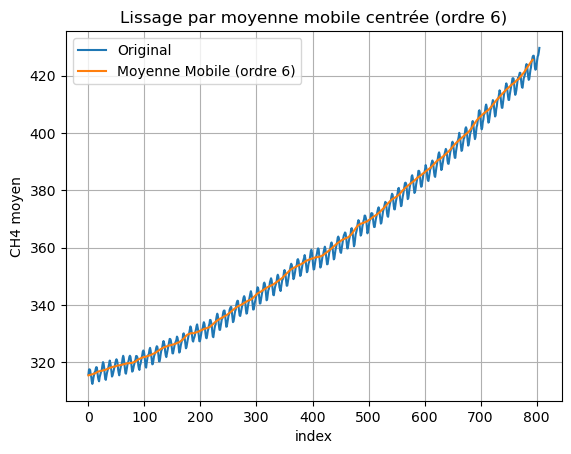

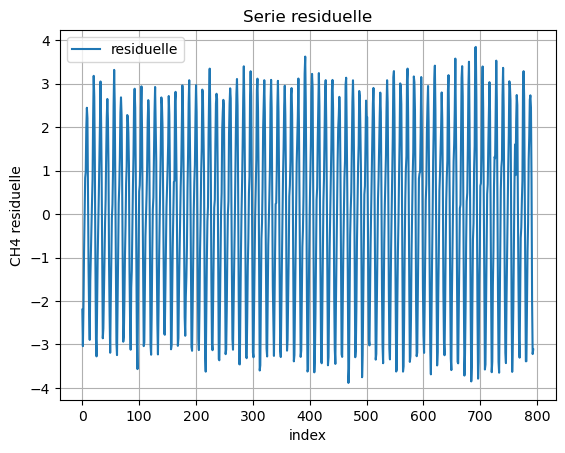

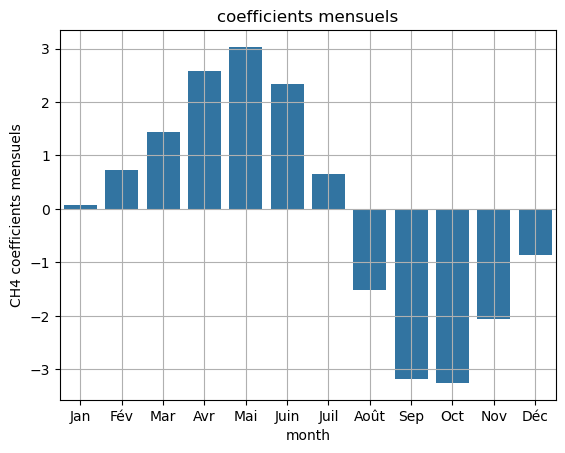

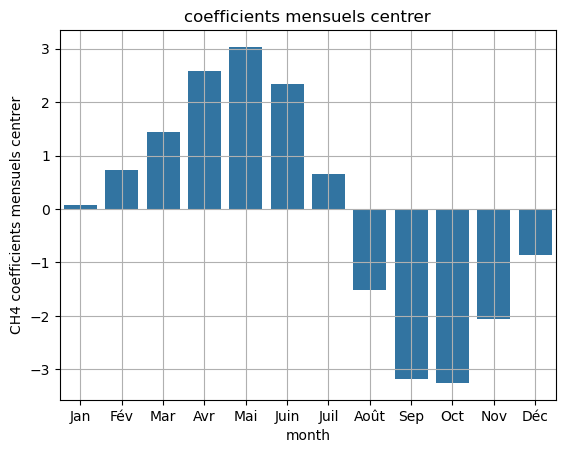

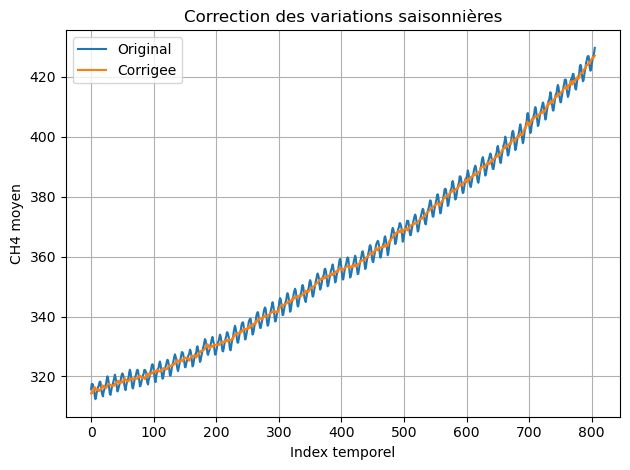

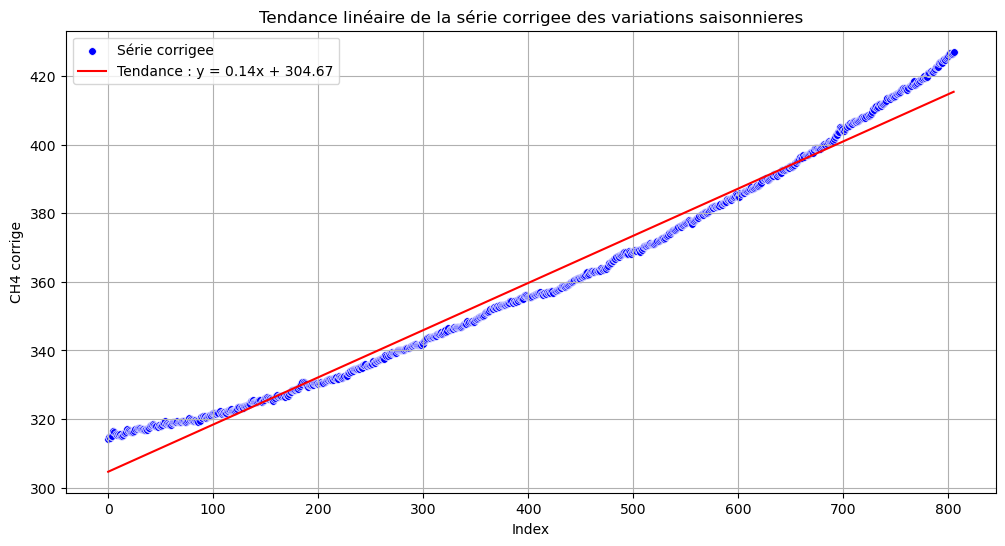

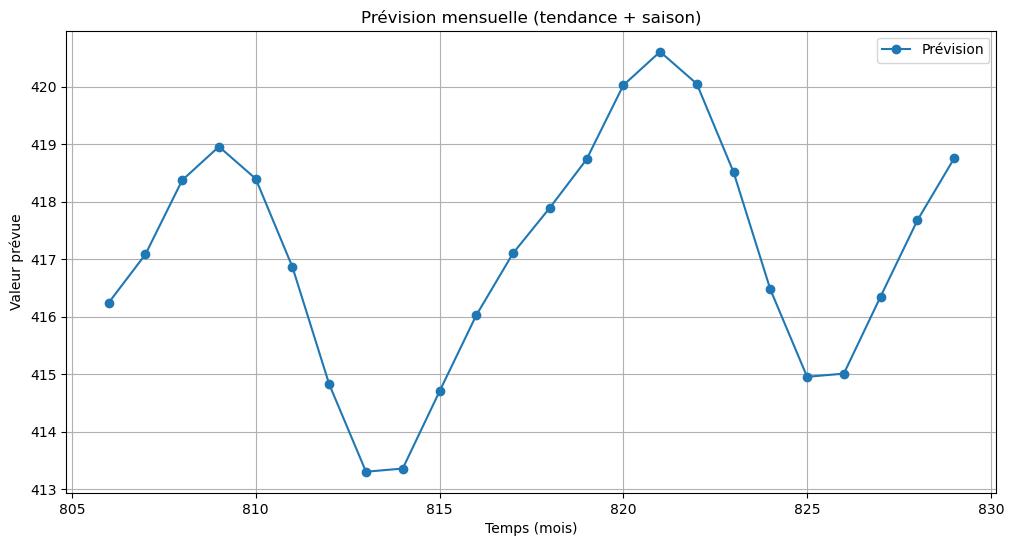

In [23]:
df_ch4_q5 = df_co2_q4
df_smoothed_ch4 = moyenne_mobile_ordre_6(df_ch4_q5)
affichage_moyenne_mobile_ordre_6(df_ch4_q5,df_smoothed_ch4,"CH4")

df_residual_ch4 = serie_residuelle_vector(df_ch4_q5,df_smoothed_ch4,6)
affichage_serie_residuelle(df_residual_ch4,"CH4")

coefficients_mensuels_ch4 = coefficients_mensuels(df_ch4_q5, df_residual_ch4, 6)
affichage_coefficients_mensuels(coefficients_mensuels_ch4,"CH4")

centrer_coefficient_mensuels_ch4 = centrer_coefficient_mensuels(coefficients_mensuels_ch4)
affichage_centrer_coefficient_mensuels(centrer_coefficient_mensuels_ch4,"CH4")

correction_ch4 = correction_variation_saisoniere(df_ch4_q5,centrer_coefficient_mensuels_ch4)
afficher_correction_variation_saisoniere(correction_ch4,"CH4")

x , y , y_pred , a , b = regression_corrige_moindres_carres(correction_ch4)
affichage_regression_corrige_moindres_carres(x,y,y_pred,a,b,"CH4")

prevision_ch4 = prevision(a,b,centrer_coefficient_mensuels_ch4,df_ch4_q5,24)
affichage_prevision(prevision_ch4)






### SF6

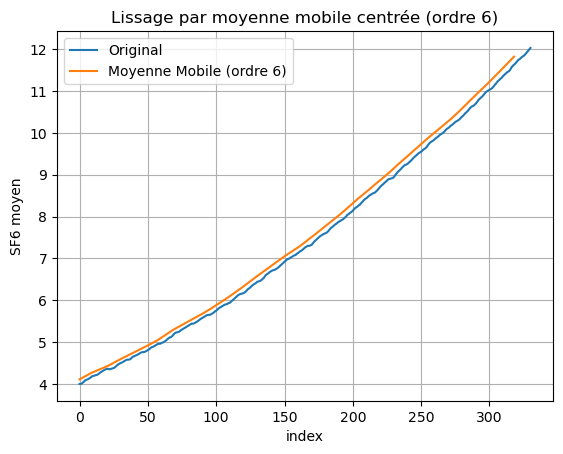

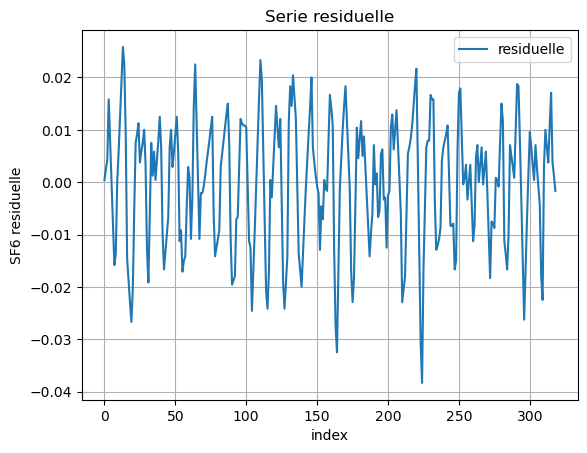

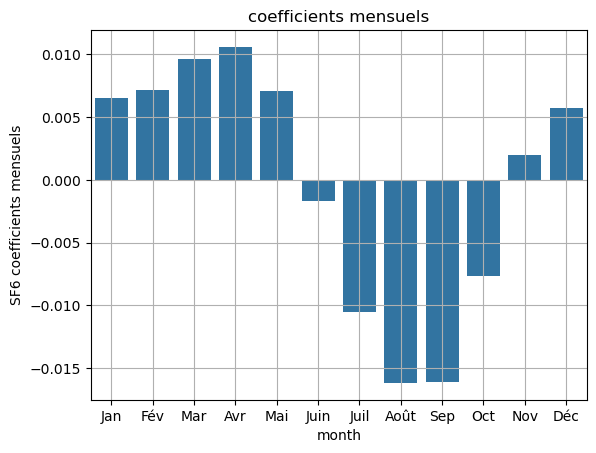

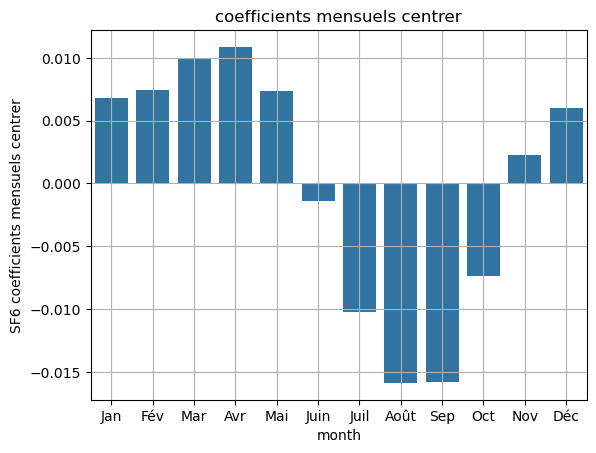

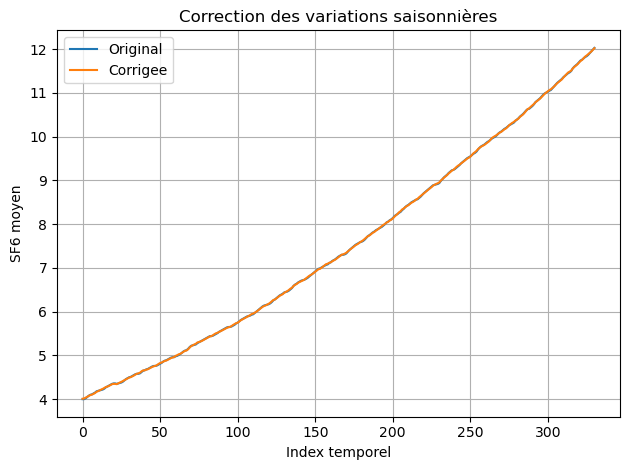

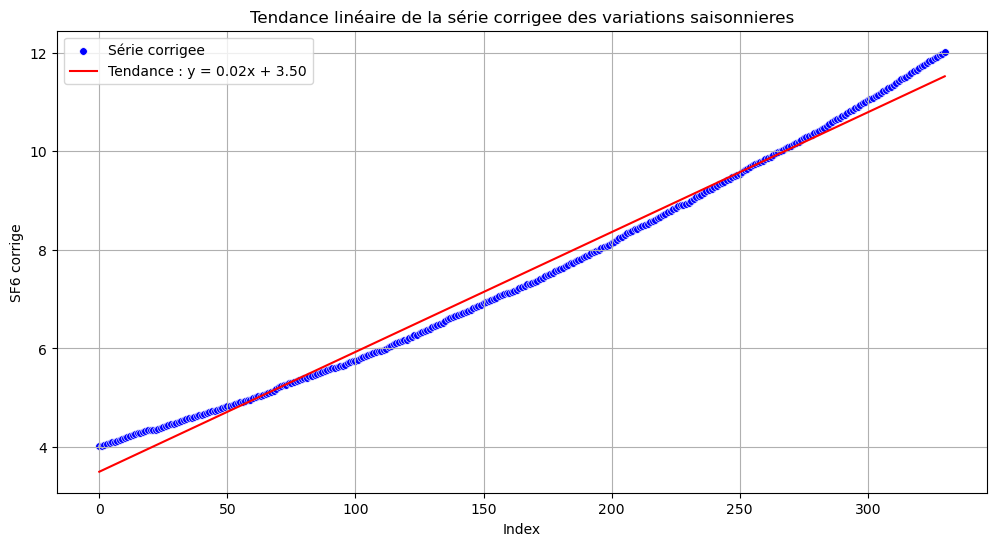

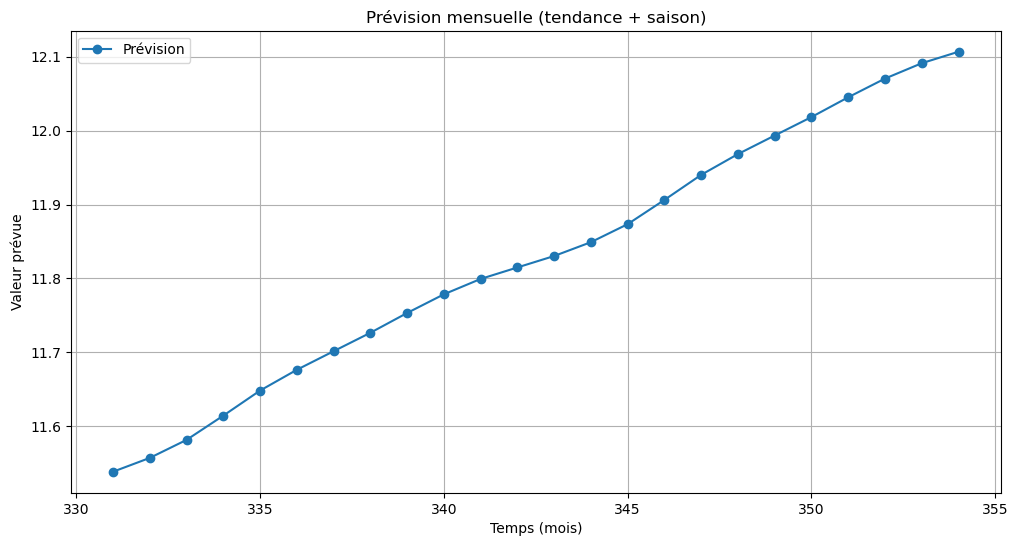

In [24]:
df_sf6_q5 = df_sf6_q4
df_smoothed_sf6 = moyenne_mobile_ordre_6(df_sf6_q5)
affichage_moyenne_mobile_ordre_6(df_sf6_q5,df_smoothed_sf6,"SF6")

df_residual_sf6 = serie_residuelle_vector(df_sf6_q5,df_smoothed_sf6,6)
affichage_serie_residuelle(df_residual_sf6,"SF6")

coefficients_mensuels_sf6 = coefficients_mensuels(df_sf6_q5, df_residual_sf6, 6)
affichage_coefficients_mensuels(coefficients_mensuels_sf6,"SF6")

centrer_coefficient_mensuels_sf6 = centrer_coefficient_mensuels(coefficients_mensuels_sf6)
affichage_centrer_coefficient_mensuels(centrer_coefficient_mensuels_sf6,"SF6")

correction_sf6 = correction_variation_saisoniere(df_sf6_q5,centrer_coefficient_mensuels_sf6)
afficher_correction_variation_saisoniere(correction_sf6,"SF6")

x , y , y_pred , a , b = regression_corrige_moindres_carres(correction_sf6)
affichage_regression_corrige_moindres_carres(x,y,y_pred,a,b,"SF6")

prevision_sf6 = prevision(a,b,centrer_coefficient_mensuels_sf6,df_sf6_q5,24)
affichage_prevision(prevision_sf6)

### N2O

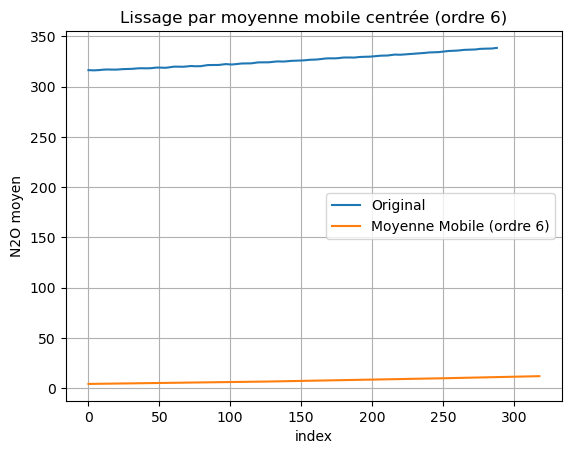

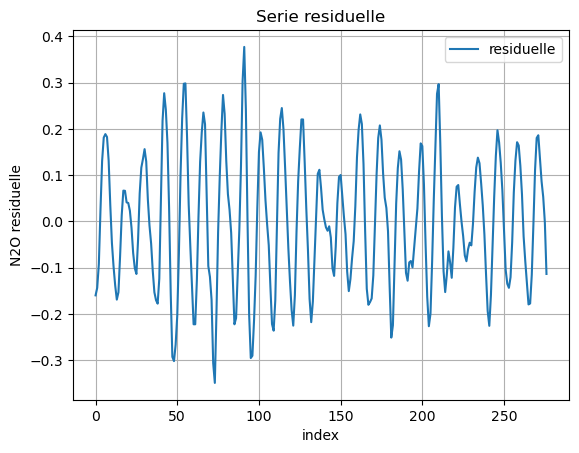

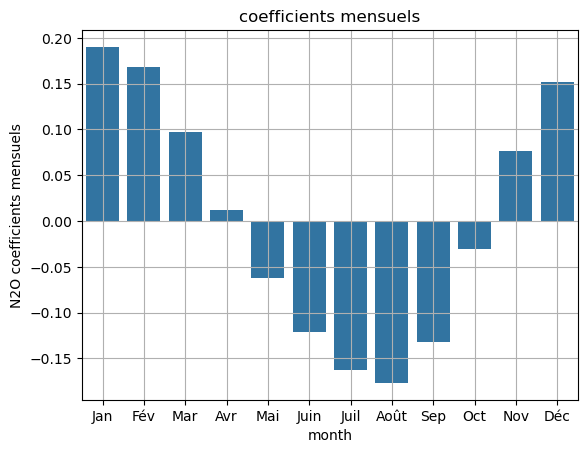

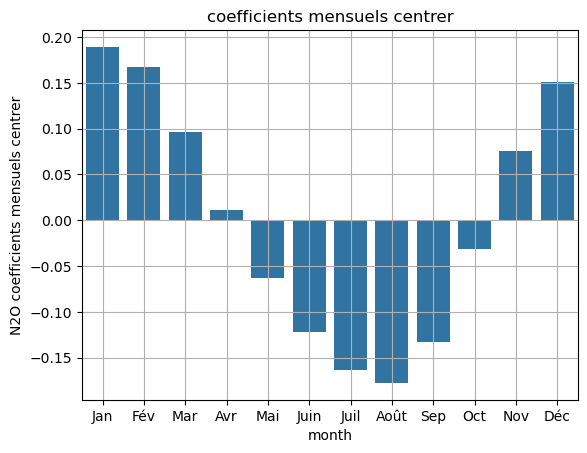

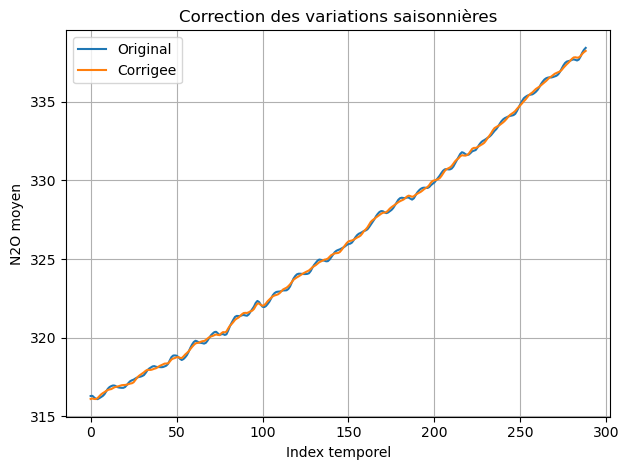

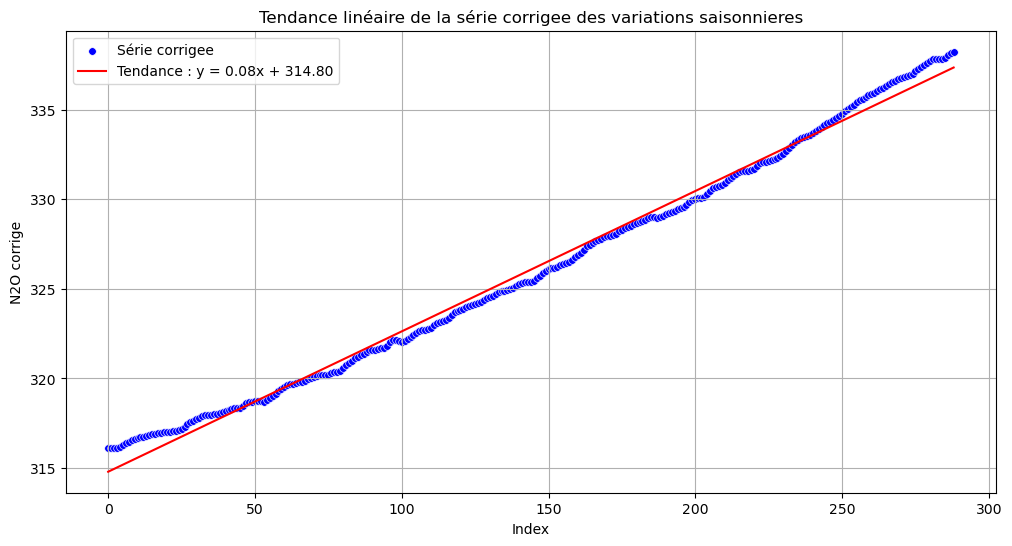

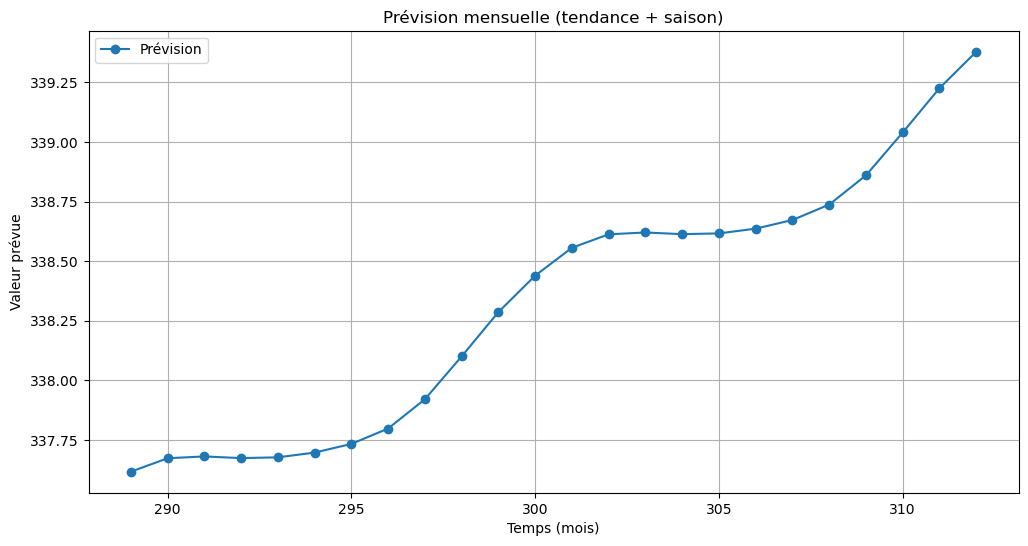

In [25]:
df_n2o_q5 = df_n2o_q4
df_smoothed_n2o = moyenne_mobile_ordre_6(df_n2o_q5)
affichage_moyenne_mobile_ordre_6(df_n2o_q5,df_smoothed_sf6,"N2O")

df_residual_n2o = serie_residuelle_vector(df_n2o_q5,df_smoothed_n2o,6)
affichage_serie_residuelle(df_residual_n2o,"N2O")

coefficients_mensuels_n2o = coefficients_mensuels(df_n2o_q5, df_residual_n2o, 6)
affichage_coefficients_mensuels(coefficients_mensuels_n2o,"N2O")

centrer_coefficient_mensuels_n2o = centrer_coefficient_mensuels(coefficients_mensuels_n2o)
affichage_centrer_coefficient_mensuels(centrer_coefficient_mensuels_n2o,"N2O")

correction_n2o = correction_variation_saisoniere(df_n2o_q5,centrer_coefficient_mensuels_n2o)
afficher_correction_variation_saisoniere(correction_n2o,"N2O")

x , y , y_pred , a , b = regression_corrige_moindres_carres(correction_n2o)
affichage_regression_corrige_moindres_carres(x,y,y_pred,a,b,"N2O")

prevision_n2o = prevision(a,b,centrer_coefficient_mensuels_n2o,df_n2o_q5,24)
affichage_prevision(prevision_n2o)

### CO2

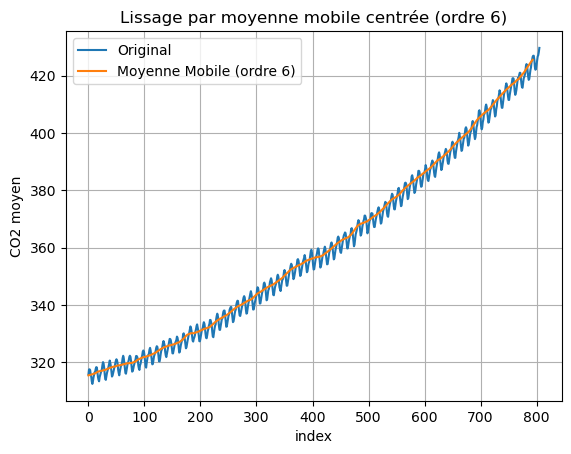

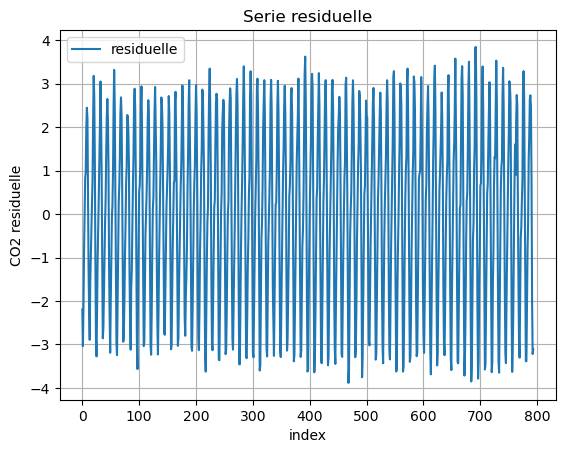

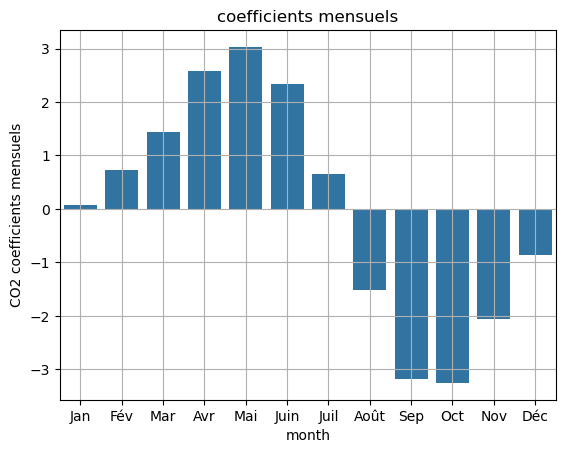

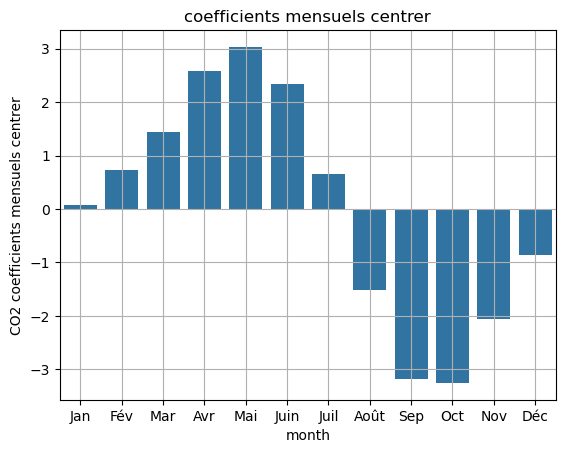

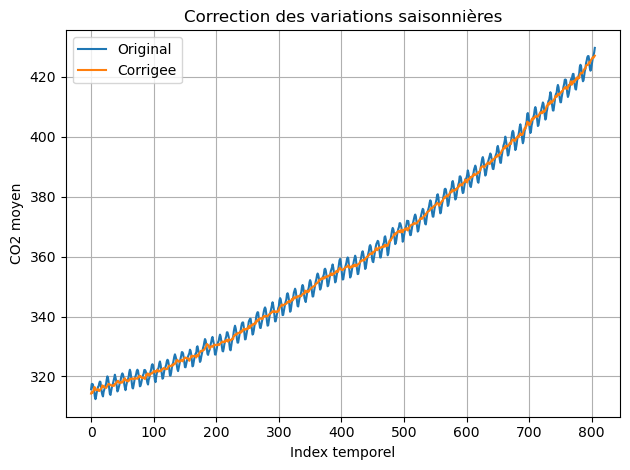

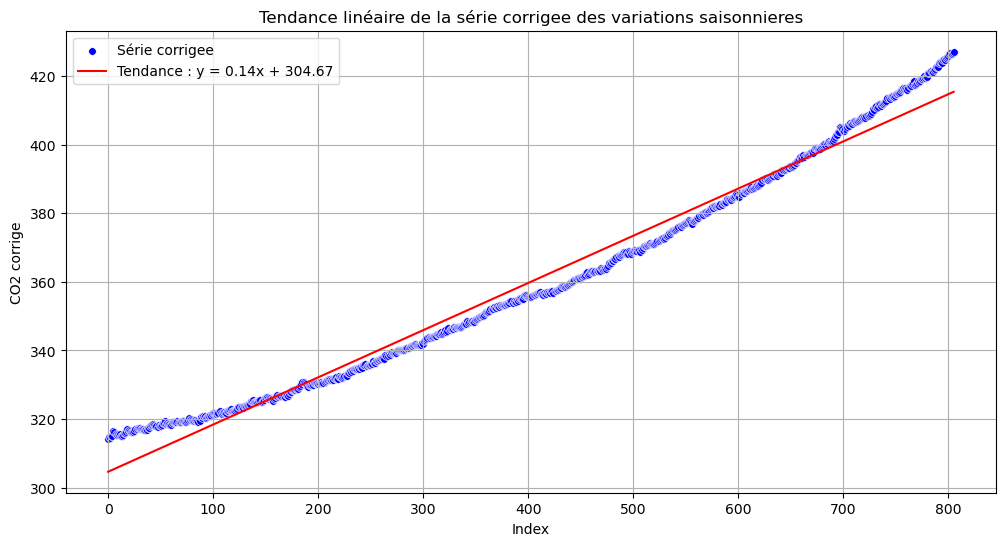

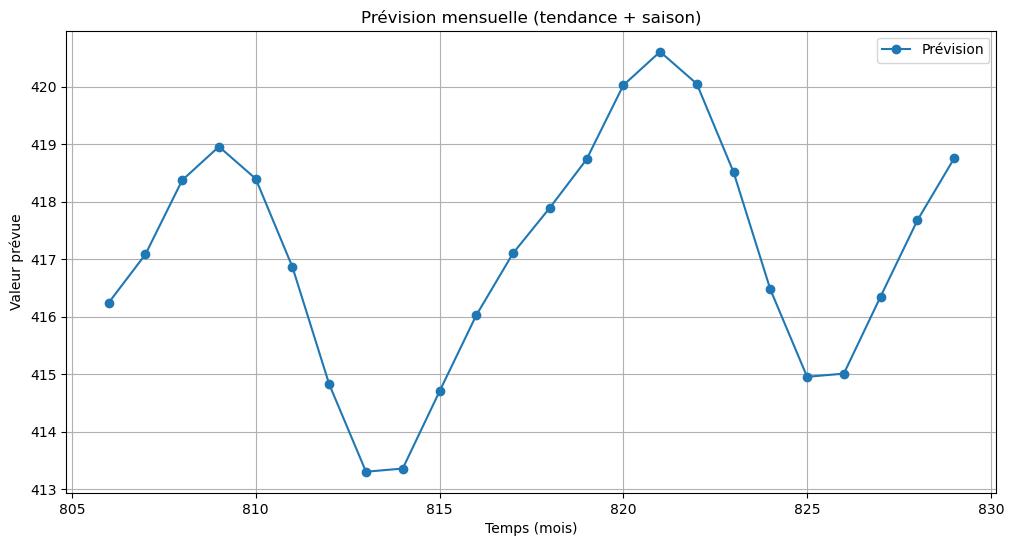

In [26]:
df_co2_q5 = df_co2_q4
df_smoothed_co2 = moyenne_mobile_ordre_6(df_co2_q5)
affichage_moyenne_mobile_ordre_6(df_co2_q5,df_smoothed_co2,"CO2")

df_residual_co2 = serie_residuelle_vector(df_co2_q5,df_smoothed_co2,6)
affichage_serie_residuelle(df_residual_co2,"CO2")

coefficients_mensuels_co2 = coefficients_mensuels(df_co2_q5, df_residual_co2, 6)
affichage_coefficients_mensuels(coefficients_mensuels_co2,"CO2")

centrer_coefficient_mensuels_co2 = centrer_coefficient_mensuels(coefficients_mensuels_co2)
affichage_centrer_coefficient_mensuels(centrer_coefficient_mensuels_co2,"CO2")

correction_co2 = correction_variation_saisoniere(df_co2_q5,centrer_coefficient_mensuels_co2)
afficher_correction_variation_saisoniere(correction_co2,"CO2")

x , y , y_pred , a , b = regression_corrige_moindres_carres(correction_co2)
affichage_regression_corrige_moindres_carres(x,y,y_pred,a,b,"CO2")

prevision_co2 = prevision(a,b,centrer_coefficient_mensuels_co2,df_co2_q5,24)
affichage_prevision(prevision_co2)

Il n'est pas possible de la faire sur les 6 premieres valeurs et les 6 dernières.

# Question 6

## Fonction

In [27]:
def lisser_serie_multiplicatif(dataframe, periode):
    dataframe_copy = dataframe.copy()
    dataframe_copy["tendance"] = dataframe_copy["average"].rolling(window=periode, center=True).mean()
    return dataframe_copy

In [28]:
def afficher_lisser_serie_multiplicatif(dataframe,y_label):
    plt.figure(figsize=(12, 5))
    plt.plot(dataframe["average"], label="Série originale", alpha=0.6)
    plt.plot(dataframe["tendance"], label="Tendance", color="red", linewidth=2)
    plt.title("Lissage par moyenne mobile")
    plt.legend()
    plt.ylabel(y_label)
    plt.grid(True)
    plt.show()

In [29]:
def composante_saisonniere_multiplicative(dataframe):
    dataframe["saison_multiplicative"] = dataframe["average"] / dataframe["tendance"]
    return dataframe

In [30]:
def afficher_saison_multiplicative(dataframe, label_serie="Serie"):
    if "saison_multiplicative" not in dataframe.columns:
        raise ValueError("La colonne 'saison_multiplicative' est absente du DataFrame. Appliquer 'composante_saisonniere_multiplicative' d'abord.")

    plt.figure(figsize=(14, 6))
    sns.lineplot(data=dataframe["saison_multiplicative"], label="Composante saisonnière multiplicative")
    plt.axhline(y=1, color="red", linestyle="--", linewidth=1.5, label="Référence")
    plt.title(f"Composante saisonnière multiplicative — {label_serie}")
    plt.xlabel("Temps (index)")
    plt.ylabel("Saison multiplicative (St)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [31]:
def calculer_coefficient_mensuel_multiplicatif(dataframe):
    coef_mensuels = dataframe.groupby("month")["saison_multiplicative"].mean()
    coef_mensuels_normalises = coef_mensuels / coef_mensuels.mean()
    return coef_mensuels_normalises

In [32]:
def corriger_coefficients_mensuels_multiplicatifs(coeficients):
    moyenne = coeficients.mean()
    coeficients_corriges = coeficients / moyenne
    return coeficients_corriges

In [33]:
def affichage_coefficients_mensuels_corige_6(serie_coefficient, y_label):
    dataframe_coeficient = serie_coefficient.reset_index()
    dataframe_coeficient.columns = ['month', 'coefficient_corrige']
    dataframe_coeficient['month'] = pd.to_numeric(dataframe_coeficient['month'], errors='coerce')
    dataframe_coeficient["hue"] = dataframe_coeficient["month"]
    plt.figure(figsize=(10, 5))
    sns.barplot(data=dataframe_coeficient, x="month", y="coefficient_corrige", hue="hue", palette="coolwarm", dodge=False, legend=False)
    plt.axhline(y=1.0, color='black', linestyle='--', linewidth=1, label="Moyenne ")
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.title("Coefficients mensuels corrigés (multiplicatif)")
    plt.xlabel("Mois")
    plt.ylabel(y_label)
    plt.xticks(
        ticks=range(0, 12),
        labels=['Jan', 'Fév', 'Mar', 'Avr', 'Mai', 'Juin', 'Juil', 'Août', 'Sep', 'Oct', 'Nov', 'Déc']
    )
    plt.tight_layout()
    plt.show()

In [34]:
def corriger_variation_saisonniere(dataframe, coefficients_corriges):
    dataframe_corrigee = dataframe.copy()
    dataframe_corrigee["coefficient_corrige"] = dataframe_corrigee["month"].map(coefficients_corriges)
    dataframe_corrigee["corrige"] = dataframe_corrigee["average"] / dataframe_corrigee["coefficient_corrige"]
    return dataframe_corrigee

In [35]:
def afficher_serie_corrigee(dataframe_corrigee):
    plt.figure(figsize=(12, 6))
    plt.plot(dataframe_corrigee.index, dataframe_corrigee["average"], label="Série initiale", color="blue", linestyle="-")
    plt.plot(dataframe_corrigee.index, dataframe_corrigee["corrige"], label="Série désaisonnalisée", color="red")
    plt.title("Série corrigée des variations saisonnières")
    plt.xlabel("Temps (index)")
    plt.ylabel("Valeur")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [36]:
def ajouter_tendance(dataframe):
    dataframe = dataframe.reset_index(drop=True).copy()
    x = dataframe.index.to_numpy()
    y = dataframe["corrige"].to_numpy()

    x_mean = np.mean(x)
    y_mean = np.mean(y)
    a = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean) ** 2)
    b = y_mean - a * x_mean

    dataframe["tendance"] = a * x + b
    return dataframe, a, b

In [37]:
def regression_tendance(dataframe):
    df = dataframe.dropna(subset=["tendance"]).copy()
    t = df.index.to_numpy()
    y = df["tendance"].to_numpy()
    a, b = np.polyfit(t, y, deg=1)
    return a, b

In [38]:
def prevision_multiplicatif(dataframe, a, b, coeficient_mensuels, nb_mois):
    previsions = []
    x_last = len(dataframe) - 1
    for i in range(1, nb_mois + 1):
        mois_futur = (x_last + i) % 12 or 12
        t = x_last + i
        tendance = a * t + b
        saison = coeficient_mensuels.get(mois_futur, 1)  
        prevision = tendance * saison
        previsions.append((t, mois_futur, prevision))
    return previsions


In [39]:
def affichage_prevision_multiplicatif(previsions):
    df_prev = pd.DataFrame(previsions, columns=["Index", "Mois", "Prévision"])
    if not pd.api.types.is_numeric_dtype(df_prev["Prévision"]):
        raise TypeError("La colonne 'Prévision' contient des objets non numériques.")
    
    plt.figure(figsize=(12, 6))
    plt.plot(df_prev["Index"], df_prev["Prévision"], marker='o', label="Prévision")
    plt.title("Prévision mensuelle (tendance × saison)")
    plt.xlabel("Temps (mois)")
    plt.ylabel("Valeur prévue")
    plt.grid(True)
    plt.legend()
    plt.show()


## CH4

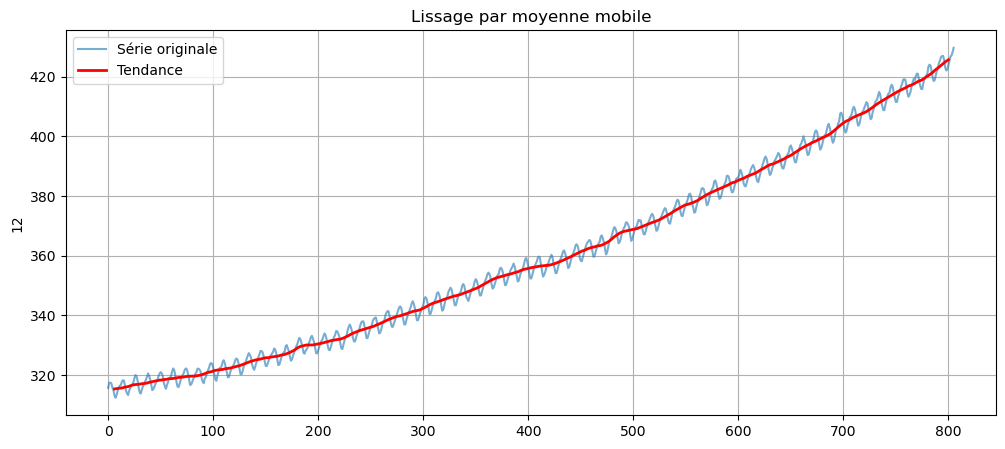

month  average  tendance
0        3   315.71       NaN
1        4   317.45       NaN
2        5   317.51       NaN
3        6   317.27       NaN
4        7   315.87       NaN
..     ...      ...       ...
801     12   425.40       NaN
802      1   426.65       NaN
803      2   427.09       NaN
804      3   428.15       NaN
805      4   429.64       NaN

[806 rows x 3 columns]

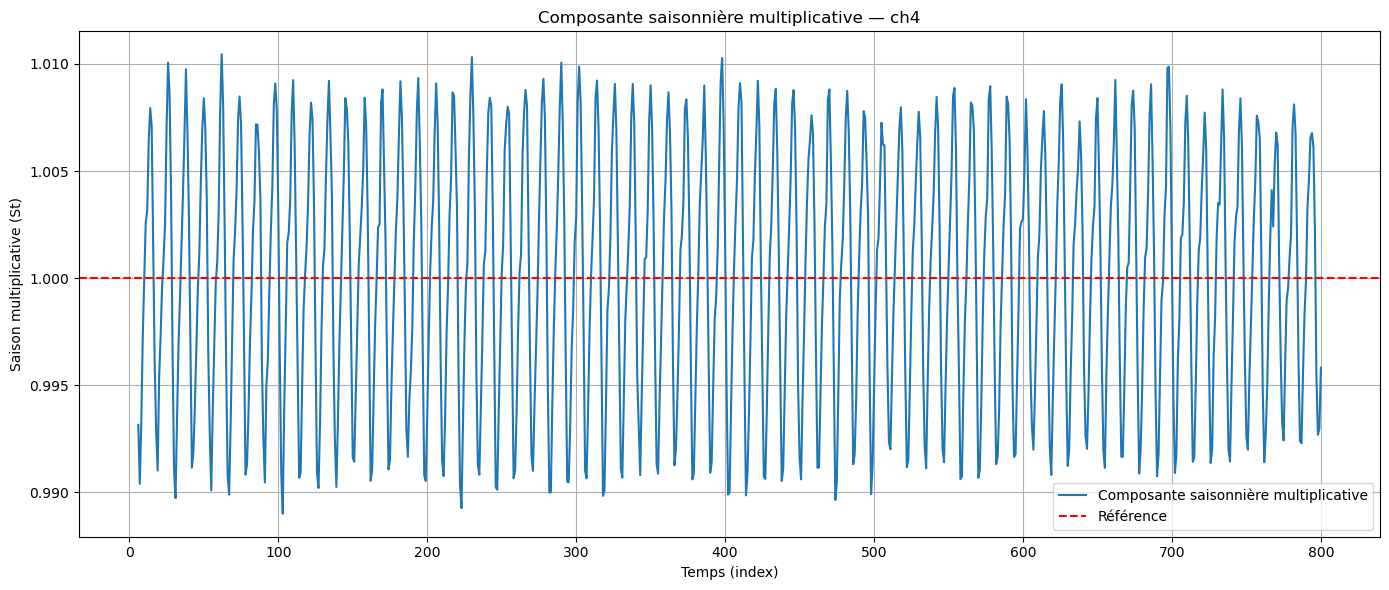

month  average  tendance  saison_multiplicative
0        3   315.71       NaN                    NaN
1        4   317.45       NaN                    NaN
2        5   317.51       NaN                    NaN
3        6   317.27       NaN                    NaN
4        7   315.87       NaN                    NaN
..     ...      ...       ...                    ...
801     12   425.40       NaN                    NaN
802      1   426.65       NaN                    NaN
803      2   427.09       NaN                    NaN
804      3   428.15       NaN                    NaN
805      4   429.64       NaN                    NaN

[806 rows x 4 columns]

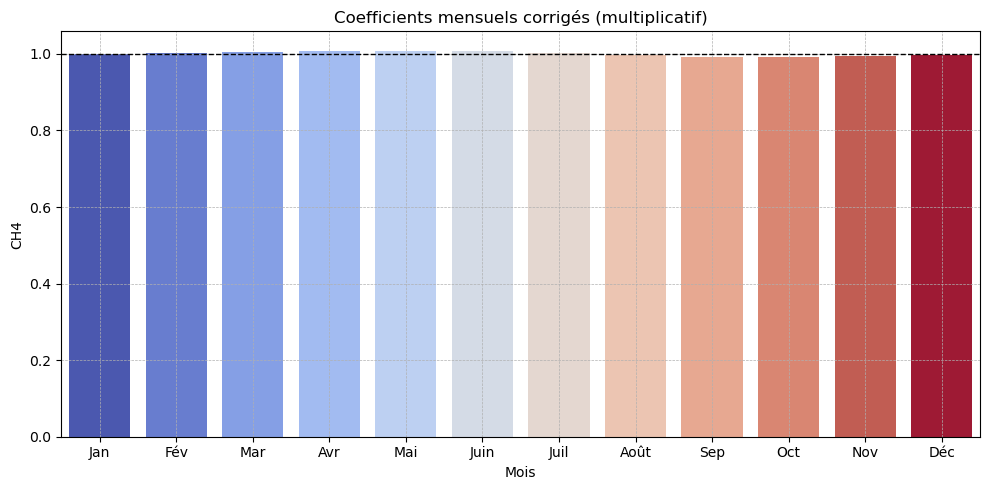

month
1     1.000181
2     1.002002
3     1.003992
4     1.007202
5     1.008453
6     1.006522
7     1.001894
8     0.995833
9     0.991176
10    0.990918
11    0.994270
12    0.997557
Name: saison_multiplicative, dtype: float64

'caca'

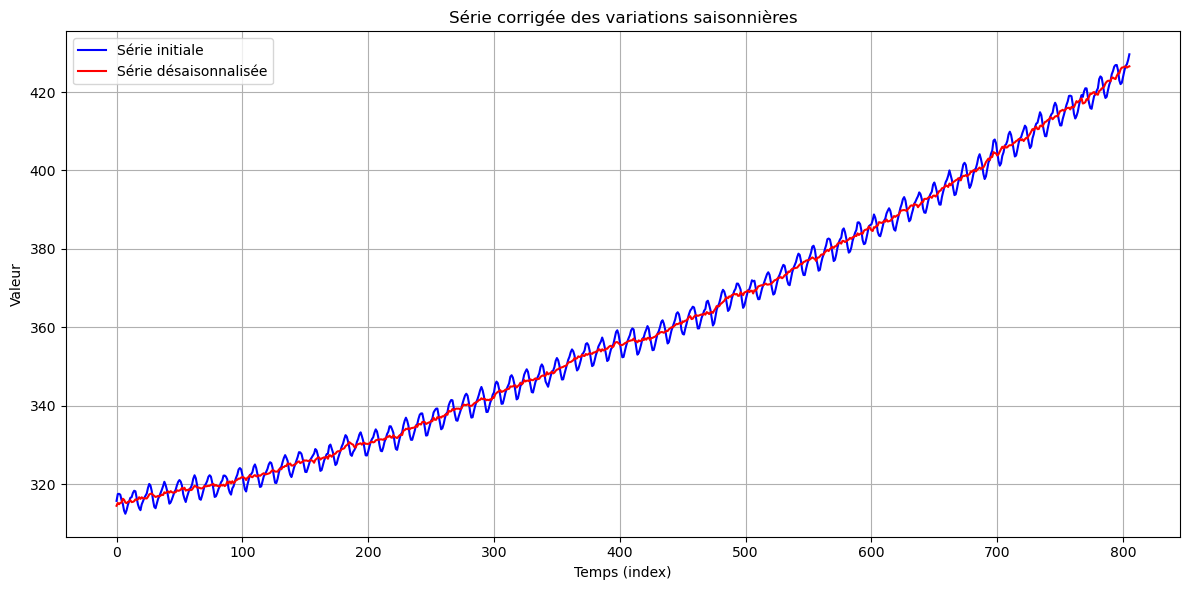

month  average  coefficient_corrige     corrige
0        3   315.71             1.003992  314.454548
1        4   317.45             1.007202  315.180229
2        5   317.51             1.008453  314.848605
3        6   317.27             1.006522  315.214326
4        7   315.87             1.001894  315.272966
..     ...      ...                  ...         ...
801     12   425.40             0.997557  426.441904
802      1   426.65             1.000181  426.572740
803      2   427.09             1.002002  426.236839
804      3   428.15             1.003992  426.447419
805      4   429.64             1.007202  426.568069

[806 rows x 4 columns]

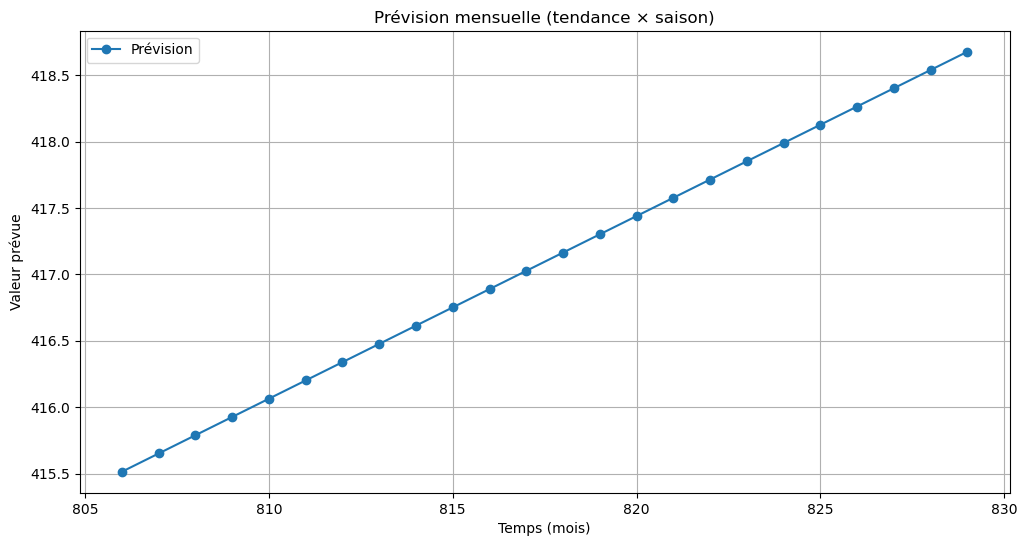

[(806, 2, np.float64(415.51419886619317)),
 (807, 3, np.float64(415.6517239771939)),
 (808, 4, np.float64(415.78924908819465)),
 (809, 5, np.float64(415.92677419919534)),
 (810, 6, np.float64(416.0642993101961)),
 (811, 7, np.float64(416.20182442119676)),
 (812, 8, np.float64(416.3393495321975)),
 (813, 9, np.float64(416.47687464319824)),
 (814, 10, np.float64(416.6143997541989)),
 (815, 11, np.float64(416.75192486519967)),
 (816, 12, np.float64(416.88944997620035)),
 (817, 1, np.float64(417.0269750872011)),
 (818, 2, np.float64(417.1645001982018)),
 (819, 3, np.float64(417.3020253092025)),
 (820, 4, np.float64(417.4395504202032)),
 (821, 5, np.float64(417.57707553120395)),
 (822, 6, np.float64(417.7146006422047)),
 (823, 7, np.float64(417.85212575320537)),
 (824, 8, np.float64(417.9896508642061)),
 (825, 9, np.float64(418.1271759752068)),
 (826, 10, np.float64(418.26470108620754)),
 (827, 11, np.float64(418.4022261972083)),
 (828, 12, np.float64(418.53975130820896)),
 (829, 1, np.floa

In [40]:
df_ch4_q6 = df_co2_q4
lisser_ch4 = lisser_serie_multiplicatif(df_ch4_q6,12)
afficher_lisser_serie_multiplicatif(lisser_ch4,12)
display(lisser_ch4)

multiplicative_ch4 = composante_saisonniere_multiplicative(lisser_ch4)
afficher_saison_multiplicative(multiplicative_ch4,"ch4")
display(multiplicative_ch4)

coefficient_mensuel_multiplicatif_ch4 = calculer_coefficient_mensuel_multiplicatif(multiplicative_ch4)
affichage_coefficients_mensuels_corige_6(coefficient_mensuel_multiplicatif_ch4,"CH4")
display(coefficient_mensuel_multiplicatif_ch4)
display("caca")

corrige_ch4 = corriger_variation_saisonniere(df_ch4_q6,coefficient_mensuel_multiplicatif_ch4)
afficher_serie_corrigee(corrige_ch4)
display(corrige_ch4)

tendance_ch4, a, b = ajouter_tendance(corrige_ch4)

prevision_multiplicative_ch4 = prevision_multiplicatif(df_ch4_q6,a,b,tendance_ch4,24)
affichage_prevision_multiplicatif(prevision_multiplicative_ch4)
display(prevision_multiplicative_ch4)











## SF6

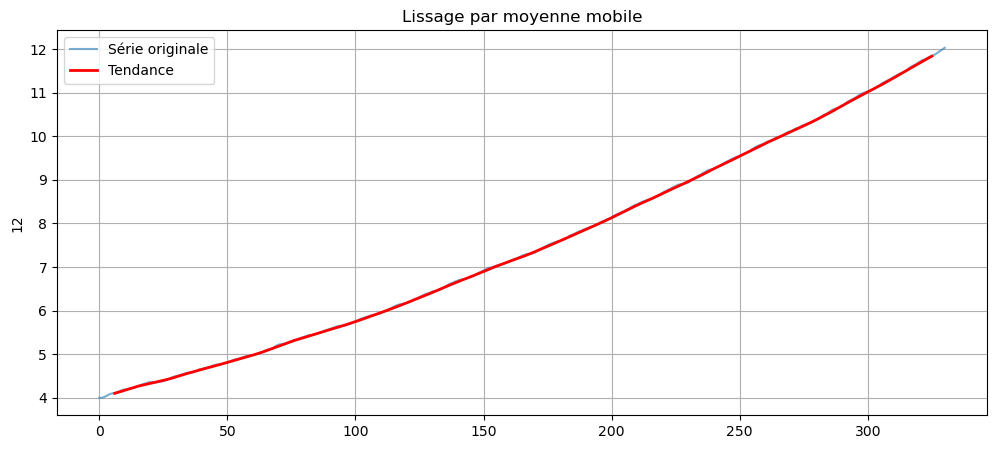

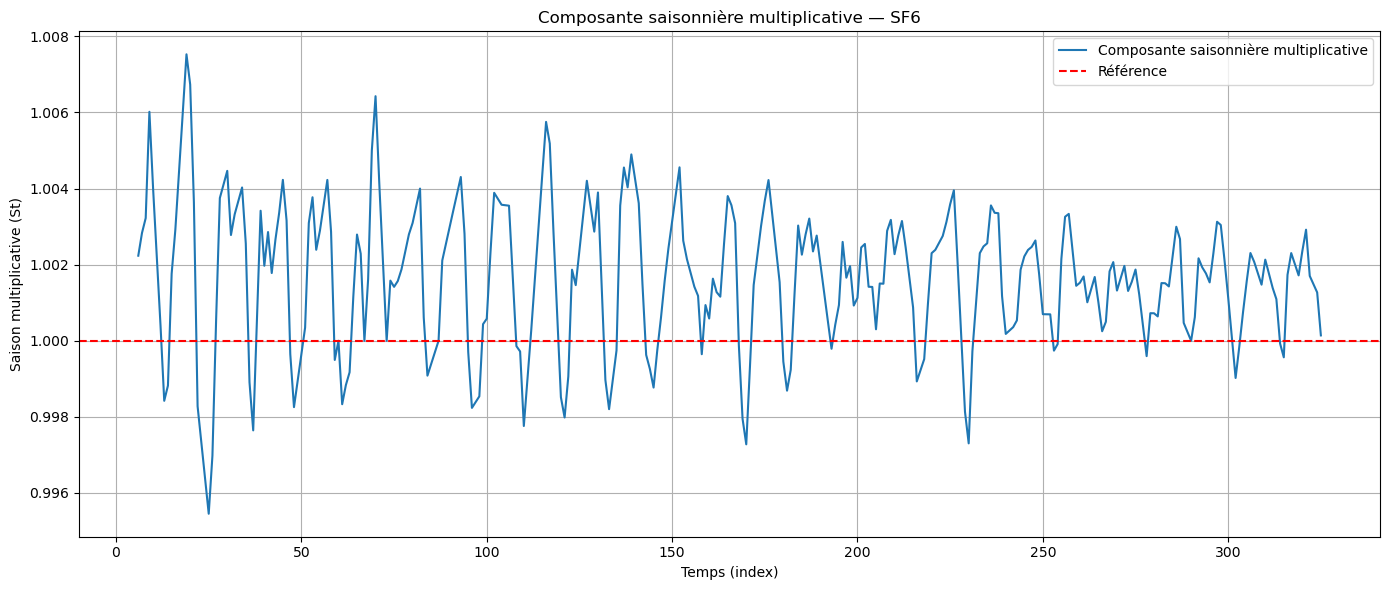

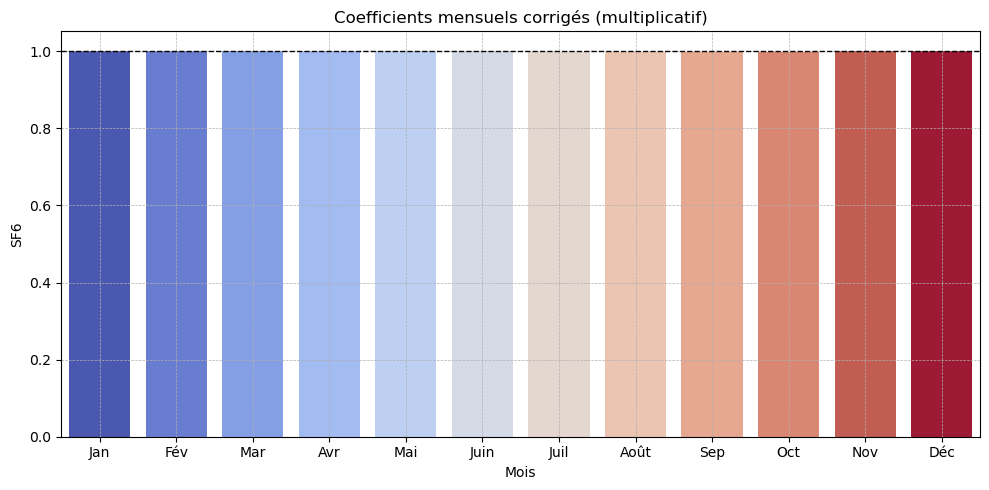

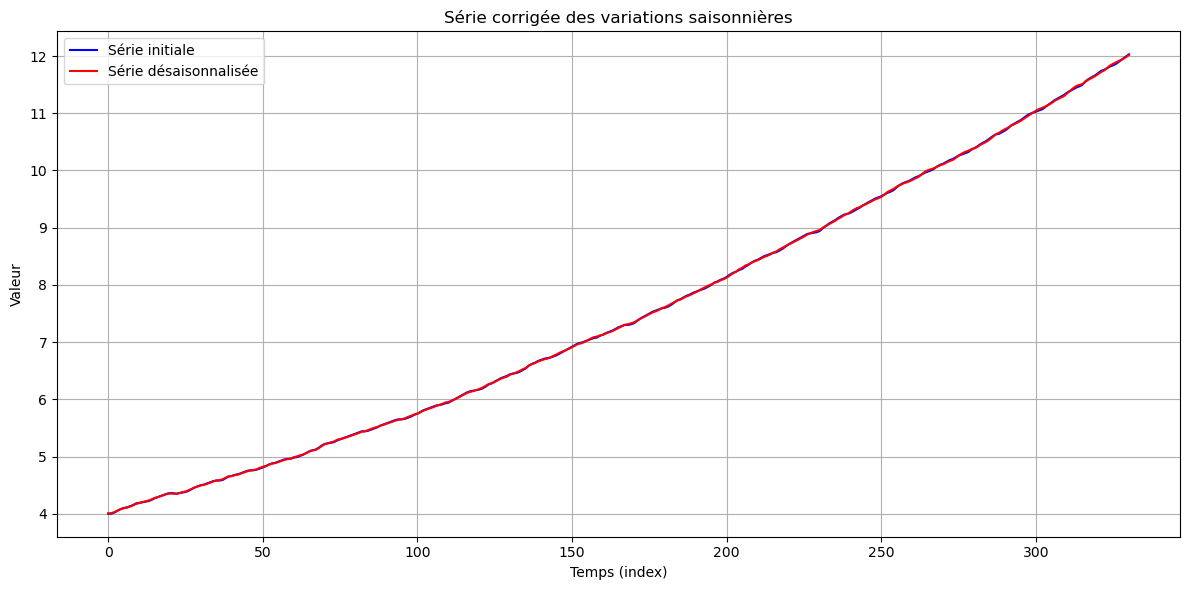

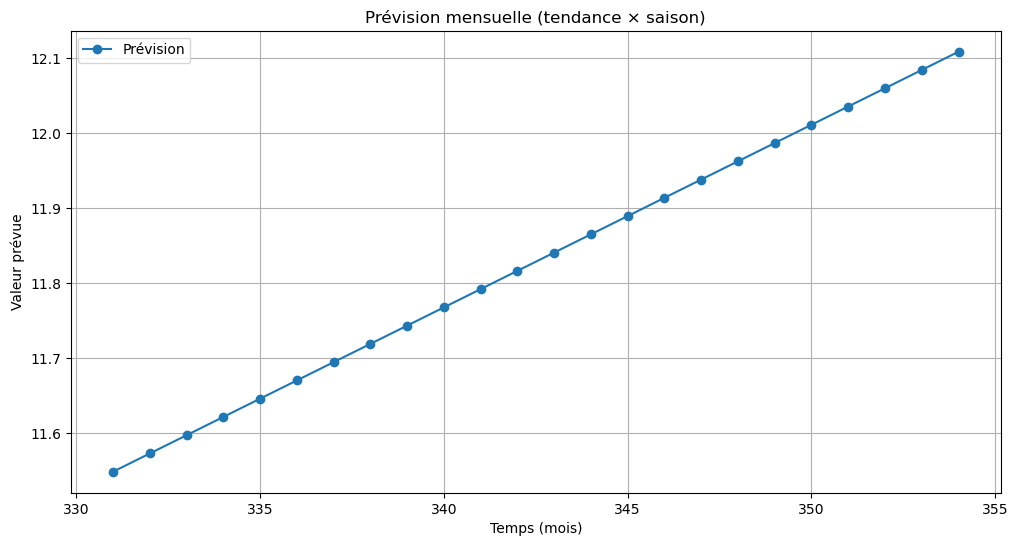

In [41]:
df_sf6_q6 = df_sf6_q4
lisser_sf6 = lisser_serie_multiplicatif(df_sf6_q6,12)
afficher_lisser_serie_multiplicatif(lisser_sf6,12)

multiplicative_sf6 = composante_saisonniere_multiplicative(lisser_sf6)
afficher_saison_multiplicative(multiplicative_sf6,"SF6")

coefficient_mensuel_multiplicatif_sf6 = calculer_coefficient_mensuel_multiplicatif(multiplicative_sf6)
affichage_coefficients_mensuels_corige_6(coefficient_mensuel_multiplicatif_sf6,"SF6")

corrige_sf6 = corriger_variation_saisonniere(df_sf6_q6,coefficient_mensuel_multiplicatif_sf6)
afficher_serie_corrigee(corrige_sf6)

tendance_sf6, a, b = ajouter_tendance(corrige_sf6)

prevision_multiplicative_sf6 = prevision_multiplicatif(df_sf6_q6,a,b,tendance_sf6,24)
affichage_prevision_multiplicatif(prevision_multiplicative_sf6)

## N2O

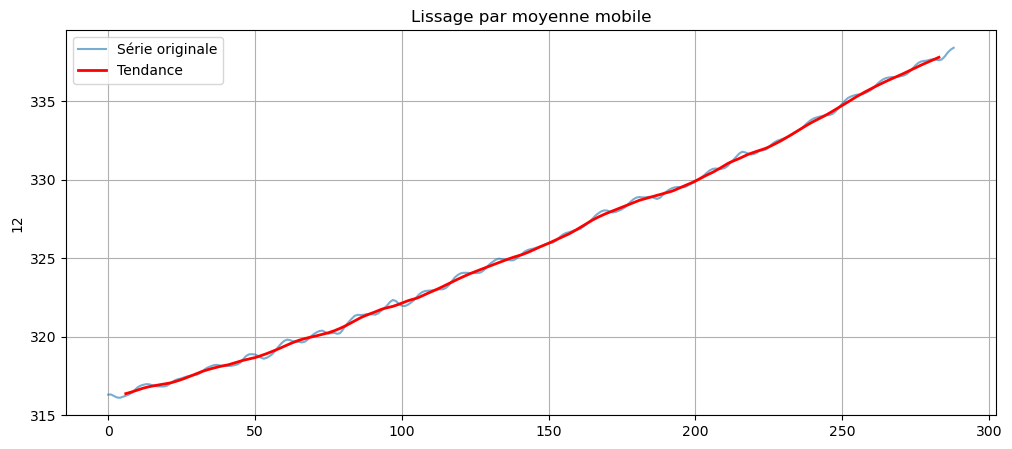

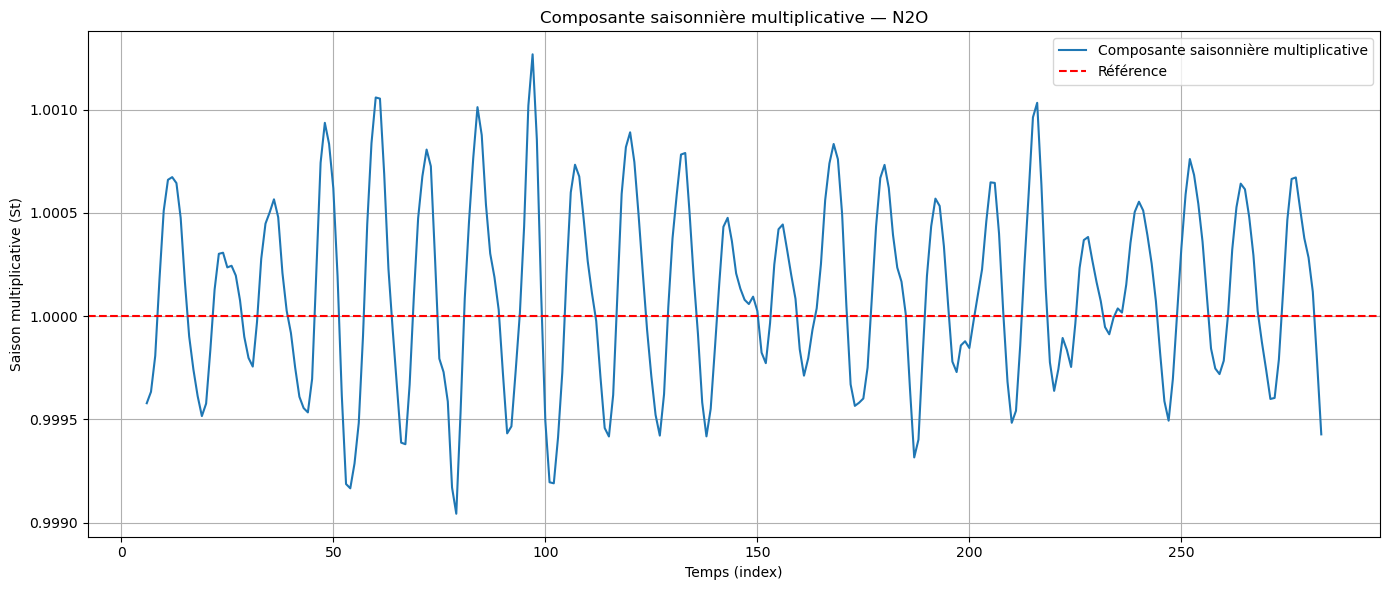

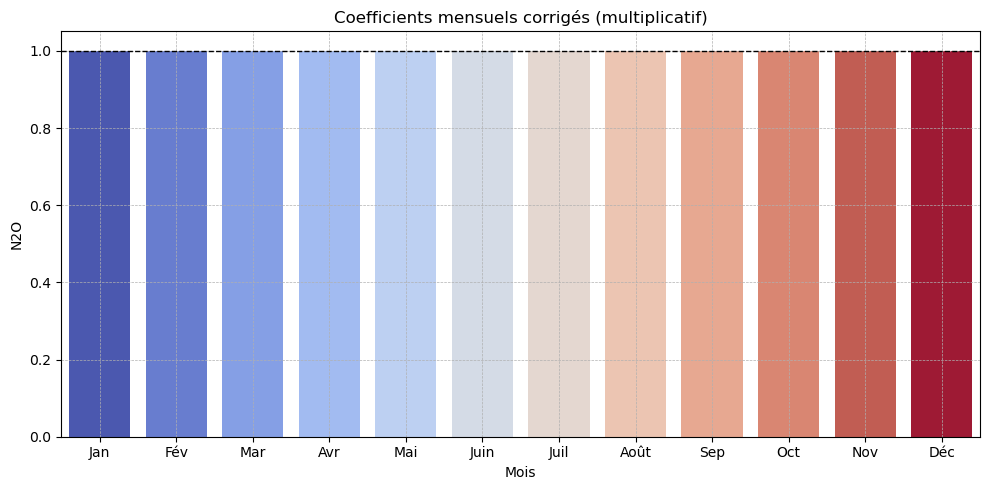

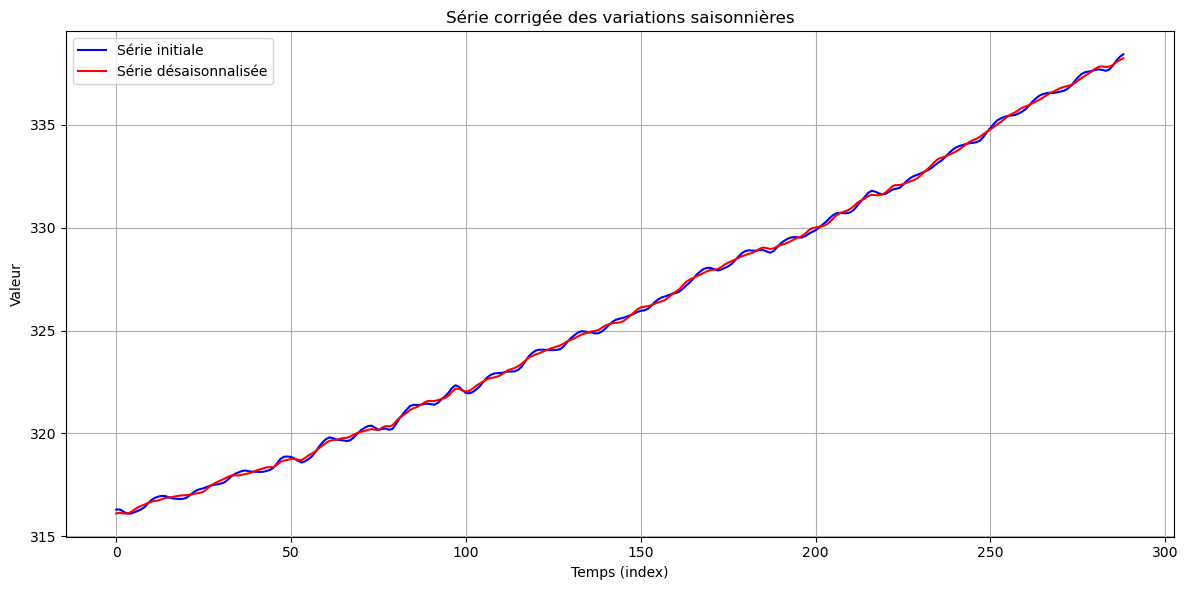

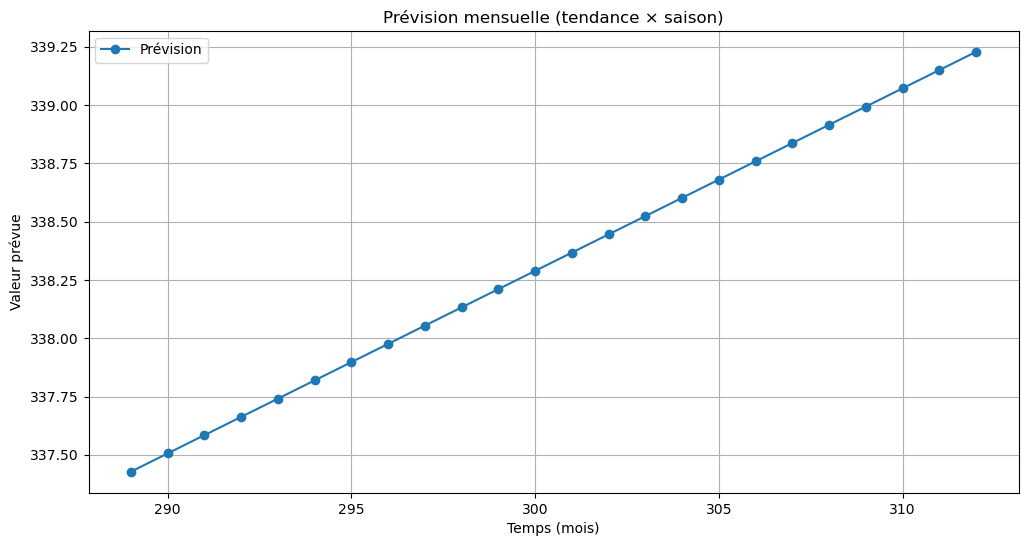

In [42]:
df_n2o_q6 = df_n2o_q4
lisser_n2o = lisser_serie_multiplicatif(df_n2o_q6,12)
afficher_lisser_serie_multiplicatif(lisser_n2o,12)

multiplicative_n2o = composante_saisonniere_multiplicative(lisser_n2o)
afficher_saison_multiplicative(multiplicative_n2o,"N2O")

coefficient_mensuel_multiplicatif_n2o = calculer_coefficient_mensuel_multiplicatif(multiplicative_n2o)
affichage_coefficients_mensuels_corige_6(coefficient_mensuel_multiplicatif_n2o,"N2O")

corrige_n2o = corriger_variation_saisonniere(df_n2o_q6,coefficient_mensuel_multiplicatif_n2o)
afficher_serie_corrigee(corrige_n2o)

tendance_n2o, a, b = ajouter_tendance(corrige_n2o)

prevision_multiplicative_n2o = prevision_multiplicatif(df_n2o_q6,a,b,tendance_n2o,24)
affichage_prevision_multiplicatif(prevision_multiplicative_n2o)

## CO2

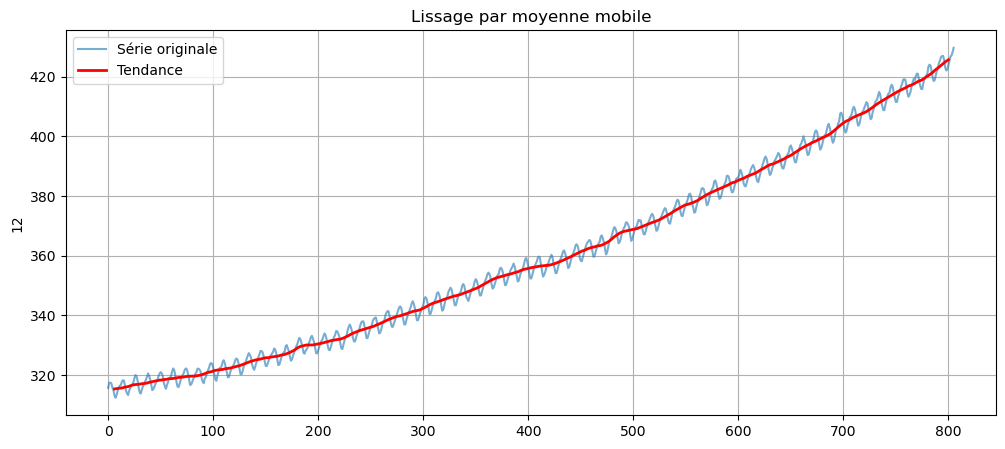

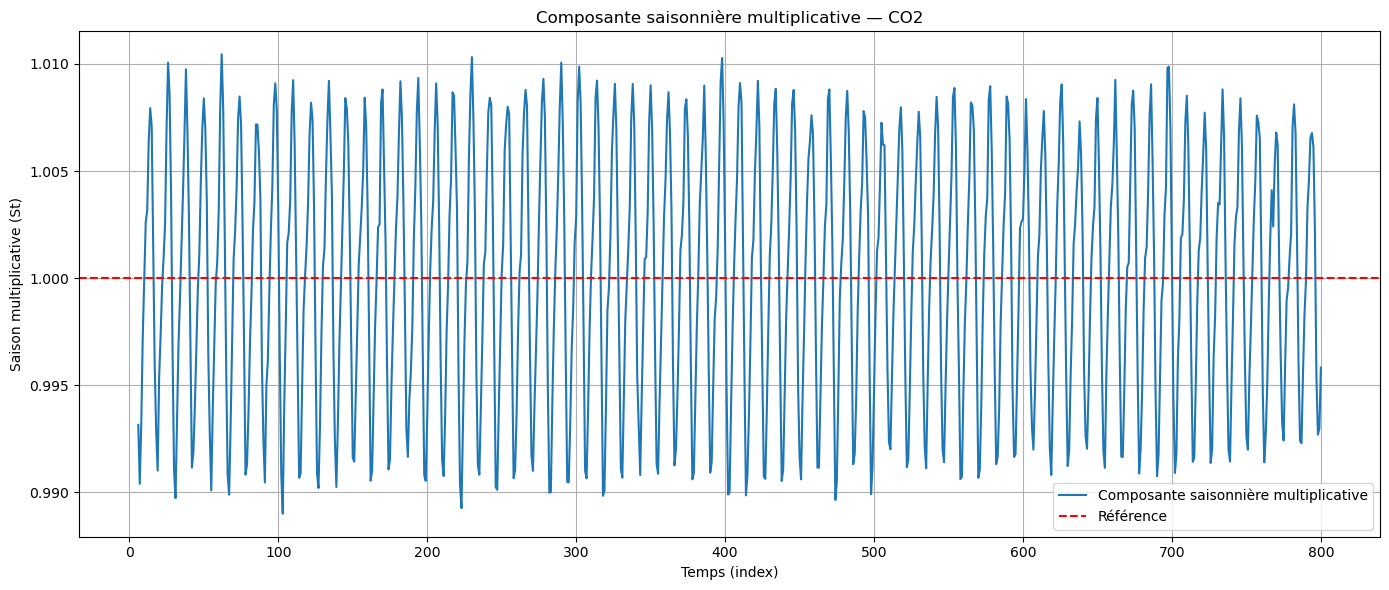

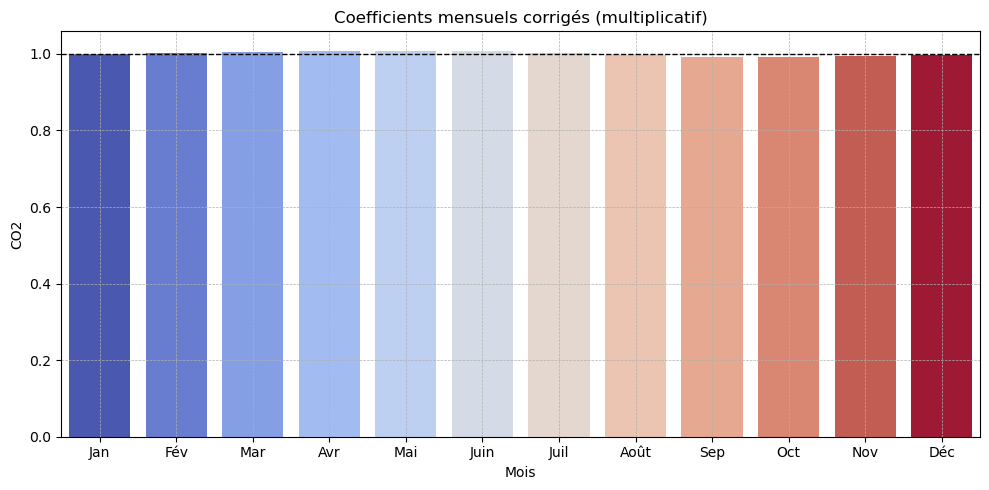

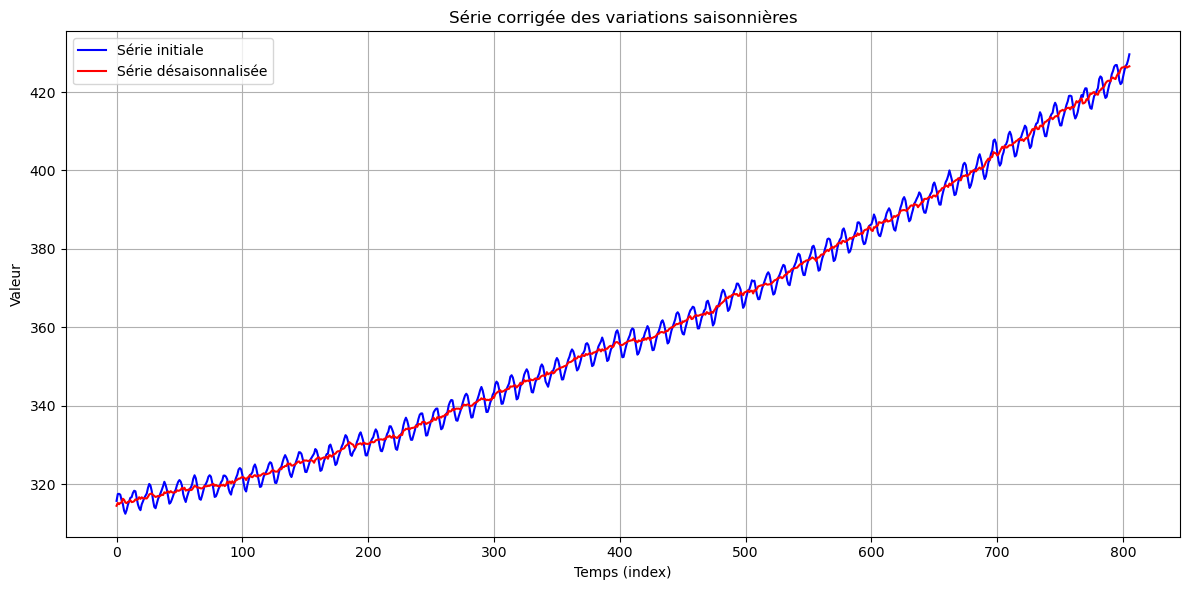

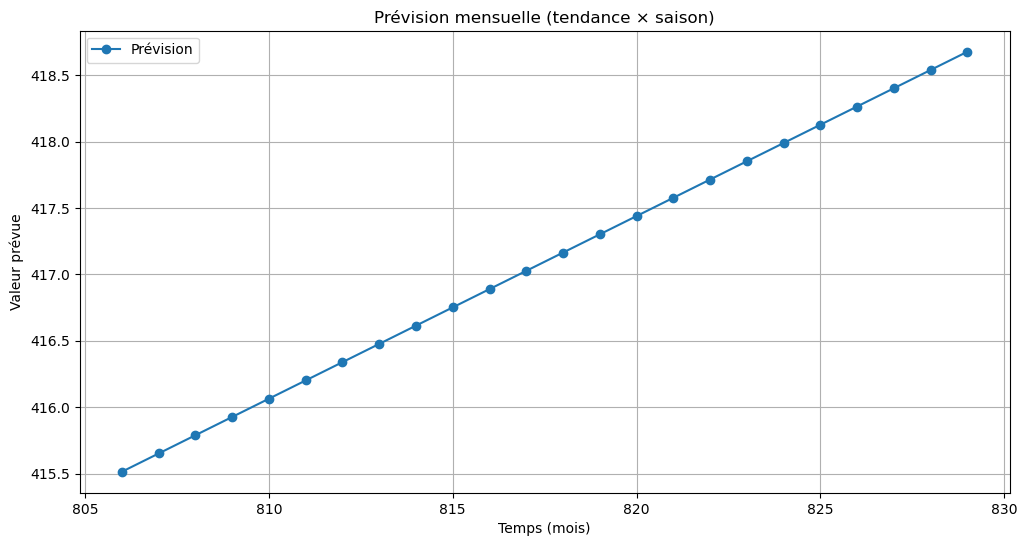

In [43]:
df_co2_q6 = df_co2_q4
lisser_co2 = lisser_serie_multiplicatif(df_co2_q6,12)
afficher_lisser_serie_multiplicatif(lisser_co2,12)

multiplicative_co2 = composante_saisonniere_multiplicative(lisser_co2)
afficher_saison_multiplicative(multiplicative_co2,"CO2")

coefficient_mensuel_multiplicatif_co2 = calculer_coefficient_mensuel_multiplicatif(multiplicative_co2)
affichage_coefficients_mensuels_corige_6(coefficient_mensuel_multiplicatif_co2,"CO2")

corrige_co2 = corriger_variation_saisonniere(df_co2_q6,coefficient_mensuel_multiplicatif_co2)
afficher_serie_corrigee(corrige_co2)

tendance_co2, a, b = ajouter_tendance(corrige_co2)

prevision_multiplicative_co2 = prevision_multiplicatif(df_co2_q6,a,b,tendance_co2,24)
affichage_prevision_multiplicatif(prevision_multiplicative_co2)

# Question 8

## Fonction

In [44]:
def regression_lineaire(dataframe):
    t = dataframe["t"].to_numpy()
    y = dataframe["average"].to_numpy()
    t_mean = np.mean(t)
    y_mean = np.mean(y)
    a = np.sum((t - t_mean) * (y - y_mean)) / np.sum((t - t_mean) ** 2)
    b = y_mean - a * t_mean
    
    return a, b

In [45]:
def tracer_regression(dataframe, a, b, title):
    t = dataframe["t"].to_numpy()
    y = dataframe["average"].to_numpy()
    y_pred = a * t + b  
    
    plt.figure(figsize=(10, 6))
    plt.scatter(t, y, label="Données", color="blue", alpha=0.6)
    plt.plot(t, y_pred, label=f"Régression : y = {a:.2f}t + {b:.2f}", color="red", linewidth=2)
    plt.title(title)
    plt.xlabel("Indice temporel (t)")
    plt.ylabel("Valeur moyenne (average)")
    plt.legend()
    plt.grid(True)
    plt.show()

In [46]:
def prevision_8(a, b, dataframe, nb_mois):

    previsions = []
    dernier_indice = dataframe["t"].iloc[-1]  
    dernier_mois = dataframe["month"].iloc[-1] 
    for i in range(1, nb_mois + 1):
        indice_futur = dernier_indice + i
        mois_futur = (dernier_mois + i - 1) % 12 + 1  
        valeur_prevue = a * indice_futur + b 
        previsions.append((indice_futur, mois_futur, valeur_prevue))
    return previsions

In [47]:
def afficher_previsions(previsions, titre):
    df_previsions = pd.DataFrame(previsions, columns=["Indice", "Mois", "Prévision"])
    plt.figure(figsize=(10, 6))
    plt.plot(df_previsions["Indice"], df_previsions["Prévision"], marker='o', label="Prévisions")
    plt.title(titre)
    plt.xlabel("Indice temporel")
    plt.ylabel("Valeur prévue")
    plt.grid(True)
    plt.legend()
    plt.show()

In [48]:
def regression_exponentielle(dataframe):
    t = dataframe["t"].to_numpy()
    y = dataframe["average"].to_numpy()
    ln_y = np.log(y)
    t_mean = np.mean(t)
    ln_y_mean = np.mean(ln_y)
    b = np.sum((t - t_mean) * (ln_y - ln_y_mean)) / np.sum((t - t_mean) ** 2)
    ln_a = ln_y_mean - b * t_mean
    a = np.exp(ln_a)  
    return a, b

In [49]:
def tracer_regression_exponentielle(dataframe, a, b, title):
    t = dataframe["t"].to_numpy()
    y = dataframe["average"].to_numpy()
    y_pred = a * np.exp(b * t) 
    
    plt.figure(figsize=(10, 6))
    plt.scatter(t, y, label="Données", color="blue", alpha=0.6)
    plt.plot(t, y_pred, label=f"Régression : y = {a:.2f} * exp({b:.4f} * t)", color="green", linewidth=2)
    plt.title(title)
    plt.xlabel("Indice temporel (t)")
    plt.ylabel("Valeur moyenne (average)")
    plt.legend()
    plt.grid(True)
    plt.show()

In [50]:
def prevision_exponentielle(a, b, dataframe, nb_mois=24):
    previsions = []
    dernier_indice = dataframe["t"].iloc[-1]  
    dernier_mois = dataframe["month"].iloc[-1] 
    for i in range(1, nb_mois + 1):
        indice_futur = dernier_indice + i
        mois_futur = (dernier_mois + i - 1) % 12 + 1  
        valeur_prevue = a * np.exp(b * indice_futur)  
        previsions.append((indice_futur, mois_futur, valeur_prevue))    
    return previsions

## Reponse

Coefficient de corrélation pour N2O : 0.9879
Coefficient de corrélation pour SF6 : 0.9952


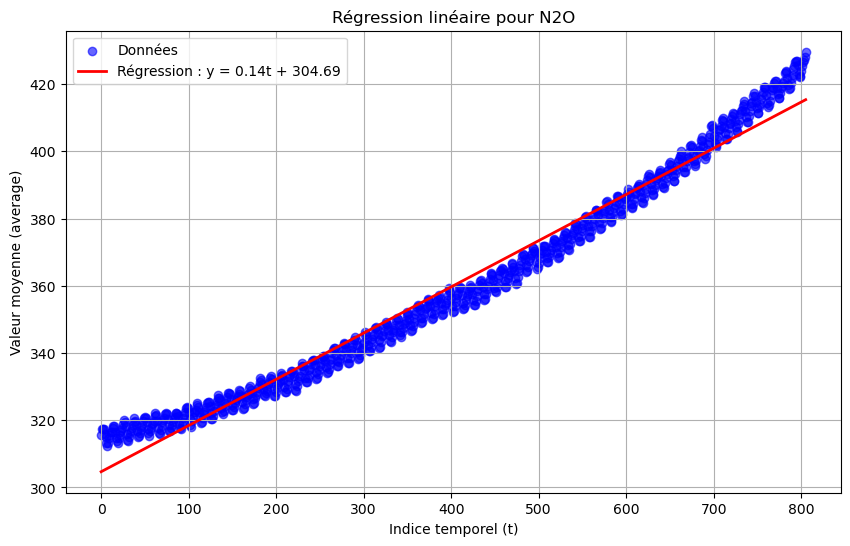

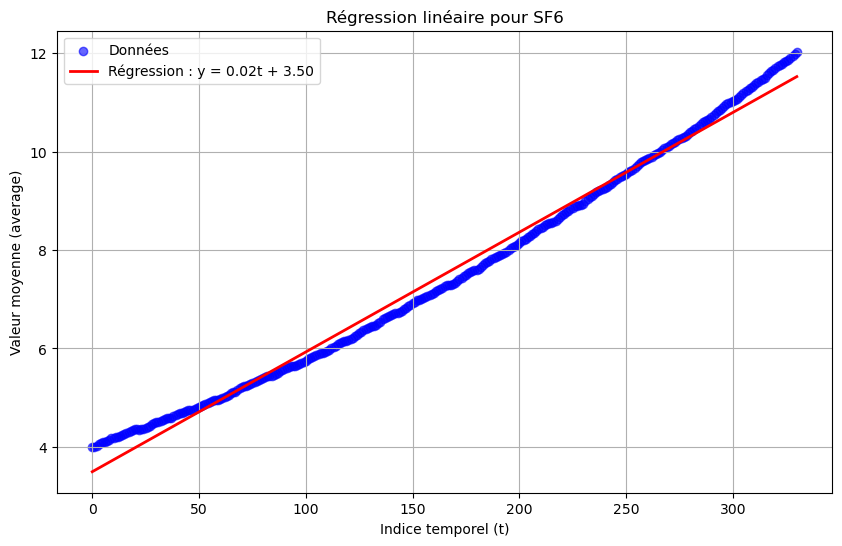

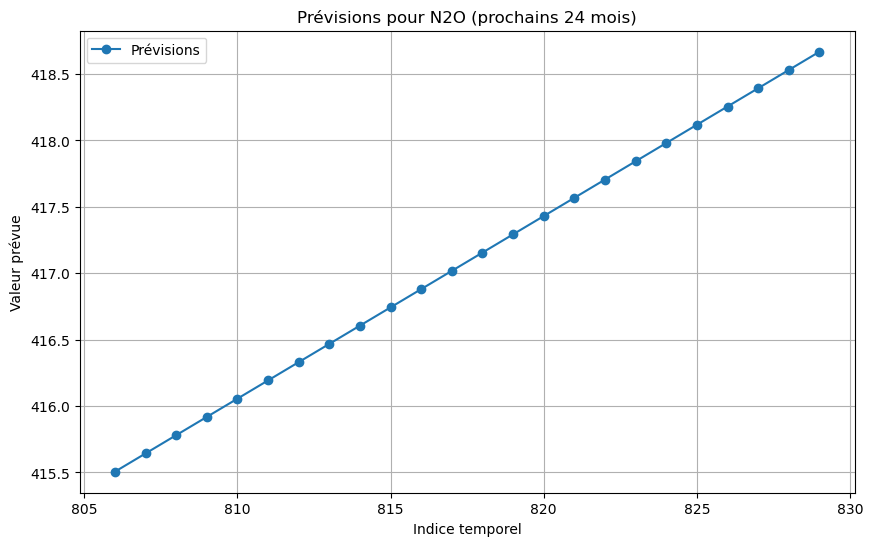

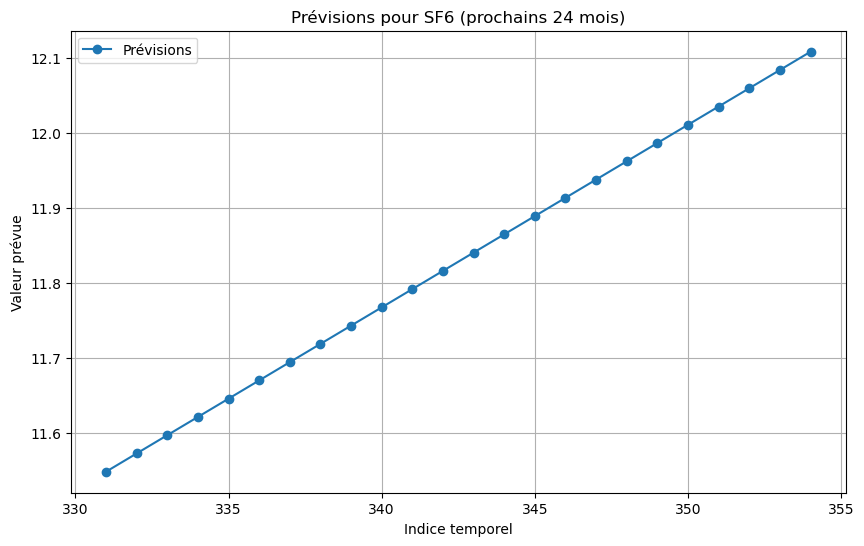

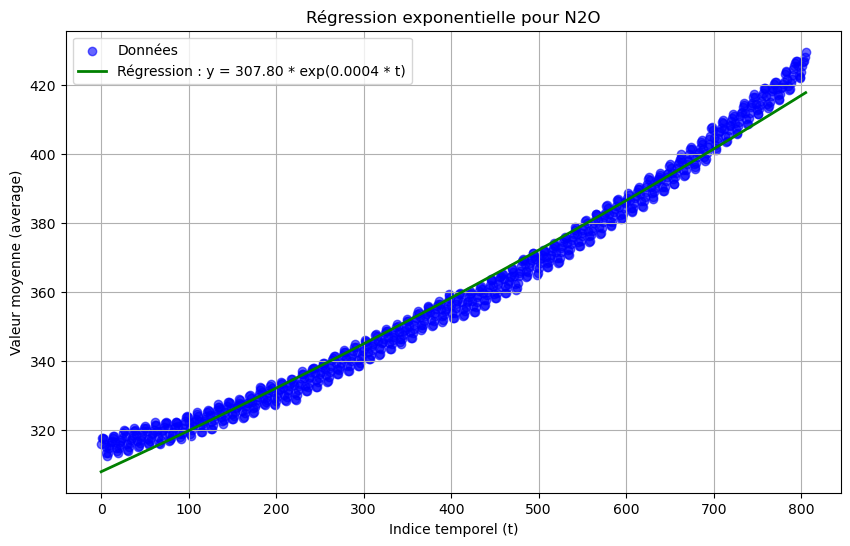

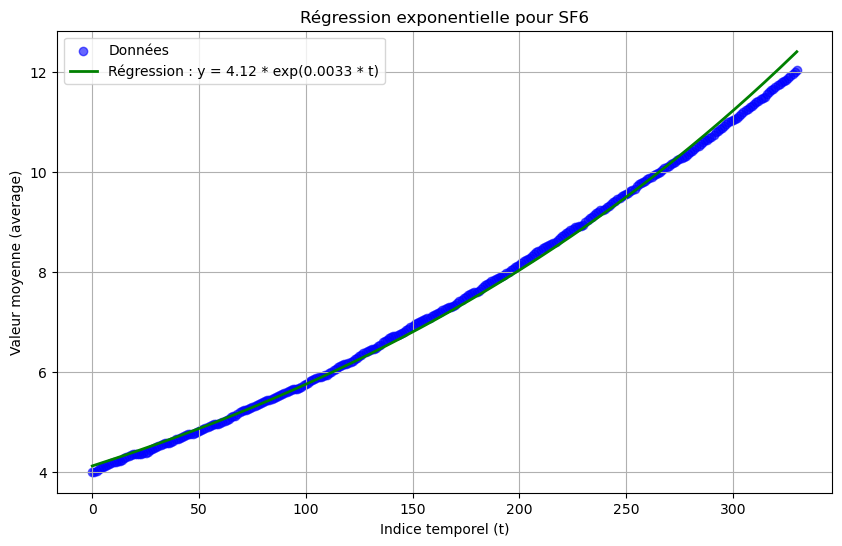

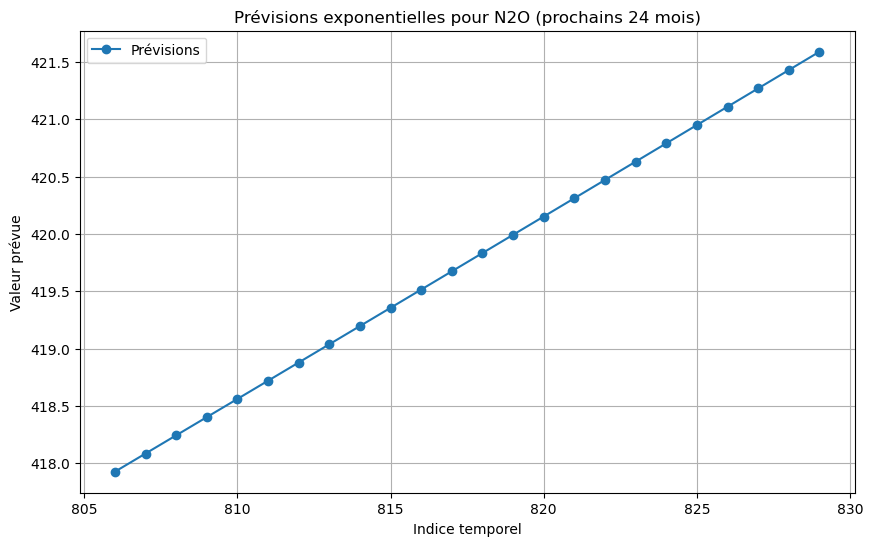

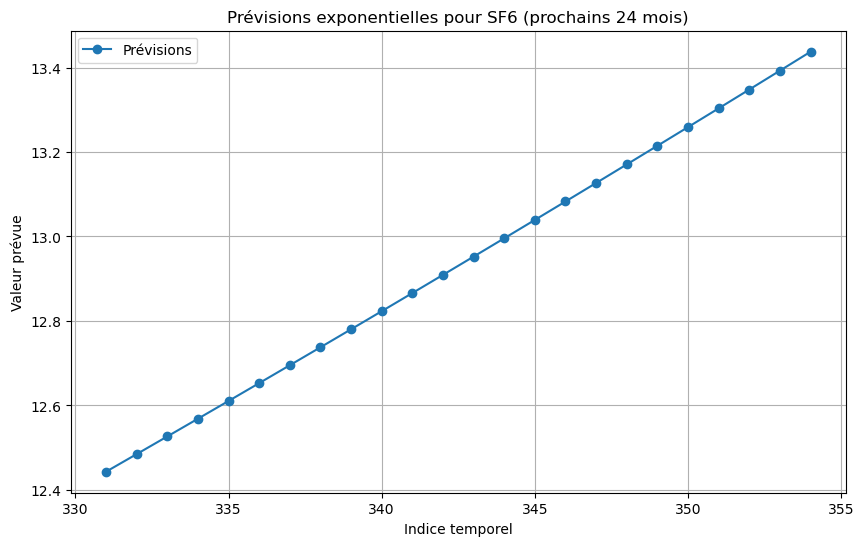

In [51]:
df_co2_q8 = df_co2
df_sf6_q8 = df_sf6

df_co2_q8 = df_co2_q8[["month", "average"]].dropna()
df_sf6_q6 = df_sf6_q6[["month", "average"]].dropna()


df_co2_q8["t"] = np.arange(len(df_co2_q8))
df_sf6_q8["t"] = np.arange(len(df_sf6_q6))

n2o_corr = np.corrcoef(df_co2_q8["t"], df_co2_q8["average"])[0, 1]

sf6_corr = np.corrcoef(df_sf6_q8["t"], df_sf6_q8["average"])[0, 1]

print(f"Coefficient de corrélation pour N2O : {n2o_corr:.4f}")
print(f"Coefficient de corrélation pour SF6 : {sf6_corr:.4f}")

a_n2o, b_n2o = regression_lineaire(df_co2_q8)
tracer_regression(df_co2_q8, a_n2o, b_n2o, "Régression linéaire pour N2O")

a_sf6, b_sf6 = regression_lineaire(df_sf6_q8)
tracer_regression(df_sf6_q8, a_sf6, b_sf6, "Régression linéaire pour SF6")

previsions_n2o = prevision_8(a_n2o, b_n2o, df_co2_q8,24)
previsions_sf6 = prevision_8(a_sf6, b_sf6, df_sf6_q8,24)

afficher_previsions(previsions_n2o, "Prévisions pour N2O (prochains 24 mois)")
afficher_previsions(previsions_sf6, "Prévisions pour SF6 (prochains 24 mois)")

a_n2o_exp, b_n2o_exp = regression_exponentielle(df_co2_q8)
tracer_regression_exponentielle(df_co2_q8, a_n2o_exp, b_n2o_exp, "Régression exponentielle pour N2O")

a_sf6_exp, b_sf6_exp = regression_exponentielle(df_sf6_q8)
tracer_regression_exponentielle(df_sf6_q8, a_sf6_exp, b_sf6_exp, "Régression exponentielle pour SF6")


previsions_n2o_exp = prevision_exponentielle(a_n2o_exp, b_n2o_exp, df_co2_q8)
afficher_previsions(previsions_n2o_exp, "Prévisions exponentielles pour N2O (prochains 24 mois)")


previsions_sf6_exp = prevision_exponentielle(a_sf6_exp, b_sf6_exp, df_sf6_q8)
afficher_previsions(previsions_sf6_exp, "Prévisions exponentielles pour SF6 (prochains 24 mois)")




# Question 9

## Fonction

In [52]:
def creer_dataset_annuel(dataframe):
    dataset_annuel = dataframe.groupby("year", as_index=False)["average"].mean()
    dataset_annuel.rename(columns={"average": "average_annual"}, inplace=True)
    return dataset_annuel

In [53]:
def tracer_nuage_points(dataframe, y_label):
    plt.figure(figsize=(10, 6))
    plt.scatter(dataframe.index, dataframe[y_label], color='blue', alpha=0.3, label='Émissions')
    plt.title("Nuage de points des émissions")
    plt.xlabel("Indice des observations")
    plt.ylabel("Émissions")
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.legend()
    plt.show()

In [54]:
def calculer_correlation(dataframe, col1, col2):
    correlation = dataframe[col1].corr(dataframe[col2])
    return correlation

In [55]:
def tracer_regression_avec_nuage(dataframe, x_col, y_col):
    x = dataframe[x_col]
    y = dataframe[y_col]
    a, b = np.polyfit(x, y, 1)  
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, color='blue', alpha=0.6, label='Données')
    y_pred = a * x + b
    plt.plot(x, y_pred, color='red', label=f"Régression : y = {a:.2f}x + {b:.2f}")
    plt.title("Nuage de points avec droite de régression")
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    plt.show()
    return a, b

In [56]:
def prevoir_2_prochaines_annees(a, b, dataframe, nb_annees=2):
    derniere_annee = dataframe["year"].max()
    annees_prevision = [derniere_annee + i for i in range(1, nb_annees + 1)]
    valeurs_prevision = [a * annee + b for annee in annees_prevision]

    previsions = pd.DataFrame({
        "year": annees_prevision,
        "predicted_average_annual": valeurs_prevision
    })
    return previsions

In [57]:
def afficher_previsions_annee(previsions, titre, molecule):
    plt.figure(figsize=(10, 6))
    plt.plot(previsions["year"], previsions["predicted_average_annual"], marker='o', label="Prévisions", color="green")
    plt.title(titre)
    plt.xlabel("Année")
    plt.ylabel(f"Valeur prévue ({molecule})")  
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [58]:
def regression_exponentielle(dataframe, x_col, y_col):
    x = dataframe[x_col].to_numpy()
    y = dataframe[y_col].to_numpy()
    ln_y = np.log(y) 
    a_ln, b = np.polyfit(x, ln_y, 1)  
    a = np.exp(a_ln) 
    return a, b

In [59]:
def tracer_regression_exponentielle(dataframe, x_col, y_col, a, b, titre):
    x = dataframe[x_col].to_numpy()
    y = dataframe[y_col].to_numpy()
    y_pred = a * np.exp(b * x)  
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, label="Données", color="blue", alpha=0.6)
    plt.plot(x, y_pred, label=f"Régression : y = {a:.2f} * exp({b:.4f} * x)", color="red", linewidth=2)
    plt.title(titre)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.legend()
    plt.grid(True)
    plt.show()

In [60]:
def prevoir_exponentielle(a, b, dataframe, x_col, nb_annees):
    derniere_annee = dataframe[x_col].max()
    annees_prevision = [derniere_annee + i for i in range(1, nb_annees + 1)]
    valeurs_prevision = [a * np.exp(b * annee) for annee in annees_prevision]
    previsions = pd.DataFrame({
        x_col: annees_prevision,
        "predicted_average_annual": valeurs_prevision
    })
    return previsions

In [61]:
def comparer_modeles(dataframe, x_col, y_col, a_lin, b_lin, a_exp, b_exp):
    x = dataframe[x_col].to_numpy()
    y = dataframe[y_col].to_numpy()
    y_pred_lin = a_lin * x + b_lin
    rmse_lin = np.sqrt(np.mean((y - y_pred_lin) ** 2))
    y_pred_exp = a_exp * np.exp(b_exp * x)
    rmse_exp = np.sqrt(np.mean((y - y_pred_exp) ** 2))

    return {"RMSE Linéaire": rmse_lin, "RMSE Exponentiel": rmse_exp}

## CH4

    year  average_annual
0   1983     1636.556667
1   1984     1644.855000
2   1985     1657.370000
3   1986     1670.210833
4   1987     1682.804167
5   1988     1693.235000
6   1989     1704.624167
7   1990     1714.533333
8   1991     1725.005833
9   1992     1735.452500
10  1993     1736.548333
11  1994     1742.157500
12  1995     1748.895000
13  1996     1751.311667
14  1997     1754.604167
15  1998     1765.653333
16  1999     1772.390000
17  2000     1773.321667
18  2001     1771.308333
19  2002     1772.716667
20  2003     1777.353333
21  2004     1777.025000
22  2005     1774.192500
23  2006     1774.998333
24  2007     1781.451667
25  2008     1787.098333
26  2009     1793.559167
27  2010     1798.964167
28  2011     1803.145833
29  2012     1808.192500
30  2013     1813.462500
31  2014     1822.705833
32  2015     1834.347500
33  2016     1843.185833
34  2017     1849.714167
35  2018     1857.448333
36  2019     1866.665833
37  2020     1878.874167
38  2021     1894.852500


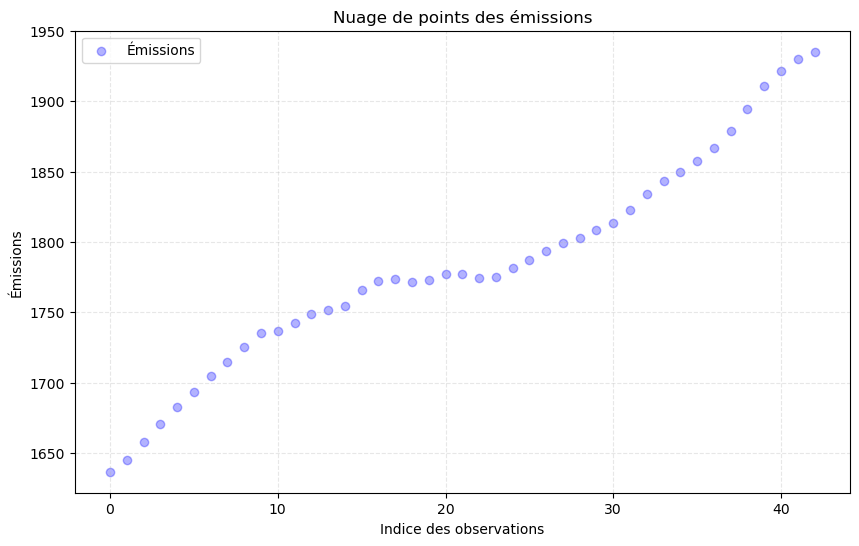

Le coefficient de corrélation est : 0.9745


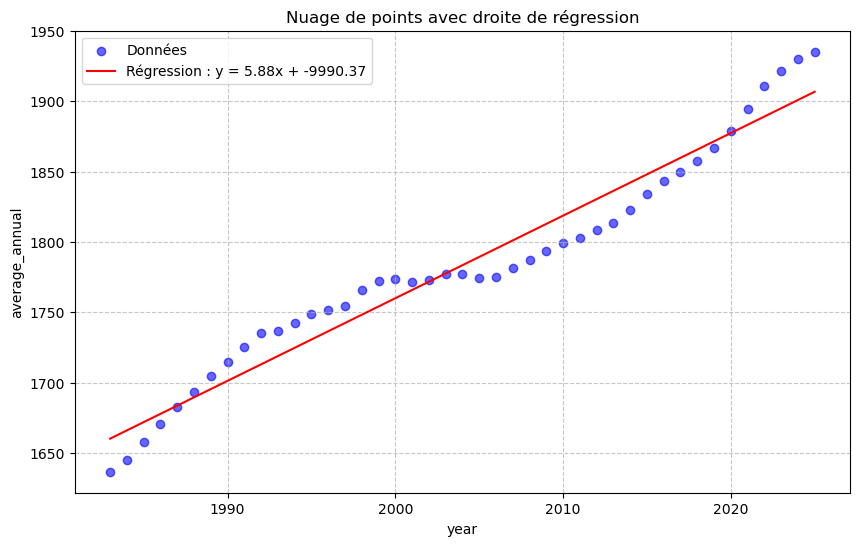

L'équation de la droite de régression est : y = 0.14x + 304.67


year  predicted_average_annual
0  2026               1912.716268
1  2027               1918.591432

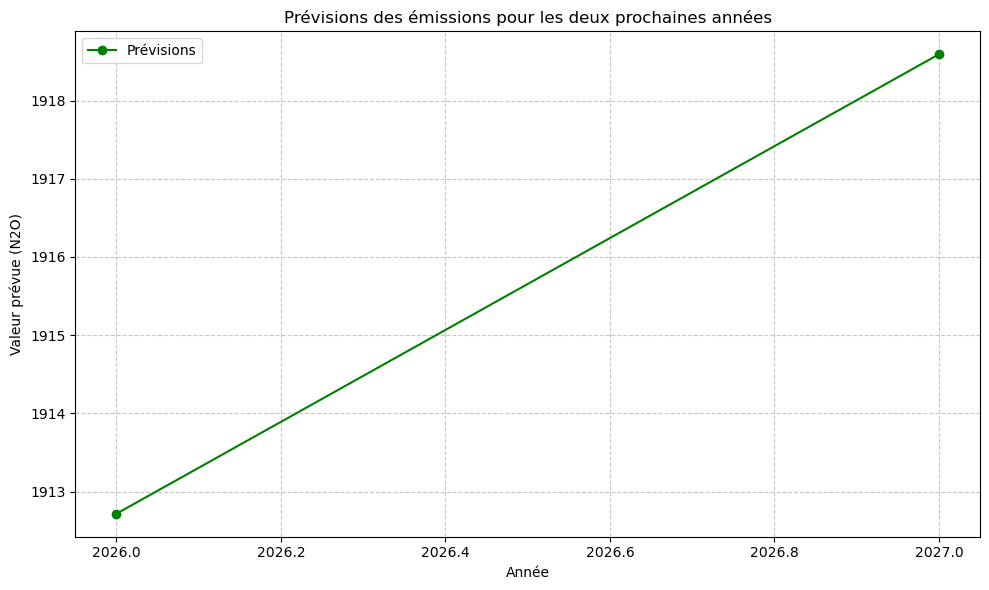

C:\Users\axelg\AppData\Local\Temp\ipykernel_19820\1608329173.py:4: RuntimeWarning: overflow encountered in exp
  y_pred = a * np.exp(b * x)


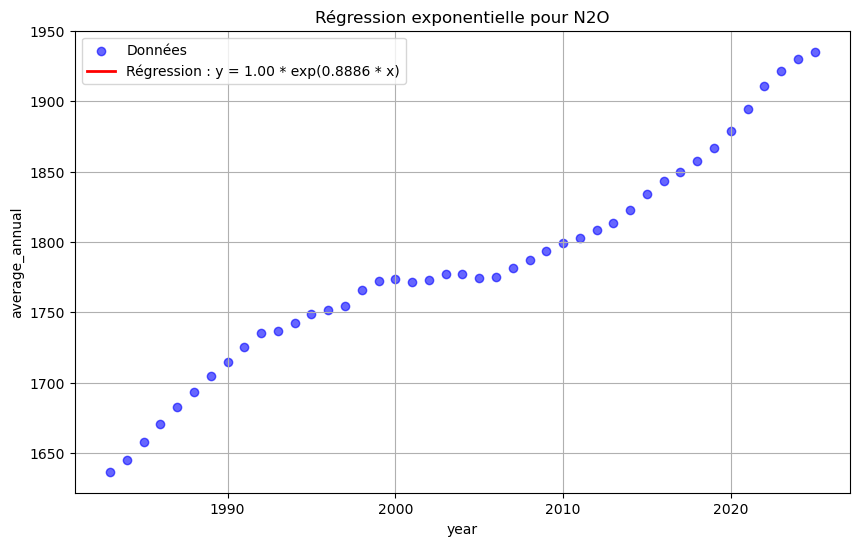

year  predicted_average_annual
0  2026                       inf
1  2027                       inf

{'RMSE Linéaire': np.float64(16.774627852466413), 'RMSE Exponentiel': np.float64(inf)}


C:\Users\axelg\AppData\Local\Temp\ipykernel_19820\895710722.py:6: RuntimeWarning: overflow encountered in exp
  y_pred_exp = a_exp * np.exp(b_exp * x)


In [62]:
df_ch4_q9 = df_ch4
dataset_annuel_ch4 = creer_dataset_annuel(df_ch4_q9)
print(dataset_annuel_ch4)
tracer_nuage_points(dataset_annuel_ch4, "average_annual")
correlation = calculer_correlation(dataset_annuel_ch4, "year", "average_annual")
print(f"Le coefficient de corrélation est : {correlation:.4f}")

a_lin, b_lin = tracer_regression_avec_nuage(dataset_annuel_ch4, "year", "average_annual")
print(f"L'équation de la droite de régression est : y = {a:.2f}x + {b:.2f}")
previsions_ch4 = prevoir_2_prochaines_annees(a_lin, b_lin, dataset_annuel_ch4)
display(previsions_ch4)
afficher_previsions_annee(previsions_ch4, "Prévisions des émissions pour les deux prochaines années", molecule="N2O")

a_exp, b_exp = regression_exponentielle(dataset_annuel_ch4, "year", "average_annual")
tracer_regression_exponentielle(dataset_annuel_ch4, "year", "average_annual", a_exp, b_exp, "Régression exponentielle pour N2O")

previsions_exp_ch4 = prevoir_exponentielle(a_exp, b_exp, dataset_annuel_ch4, "year", 2)
display(previsions_exp_ch4)

resultats_comparaison = comparer_modeles(dataset_annuel_ch4, "year", "average_annual", a_lin, b_lin, a_exp, b_exp)
print(resultats_comparaison)


## SF6

    year  average_annual
0   1997        4.041667
1   1998        4.208333
2   1999        4.385833
3   2000        4.585000
4   2001        4.778333
5   2002        4.980000
6   2003        5.229167
7   2004        5.455000
8   2005        5.670000
9   2006        5.910833
10  2007        6.179167
11  2008        6.466667
12  2009        6.755000
13  2010        7.040000
14  2011        7.300833
15  2012        7.604167
16  2013        7.915833
17  2014        8.248333
18  2015        8.579167
19  2016        8.909167
20  2017        9.258333
21  2018        9.603333
22  2019        9.943333
23  2020       10.267500
24  2021       10.635000
25  2022       11.017500
26  2023       11.404167
27  2024       11.805000
28  2025       12.030000


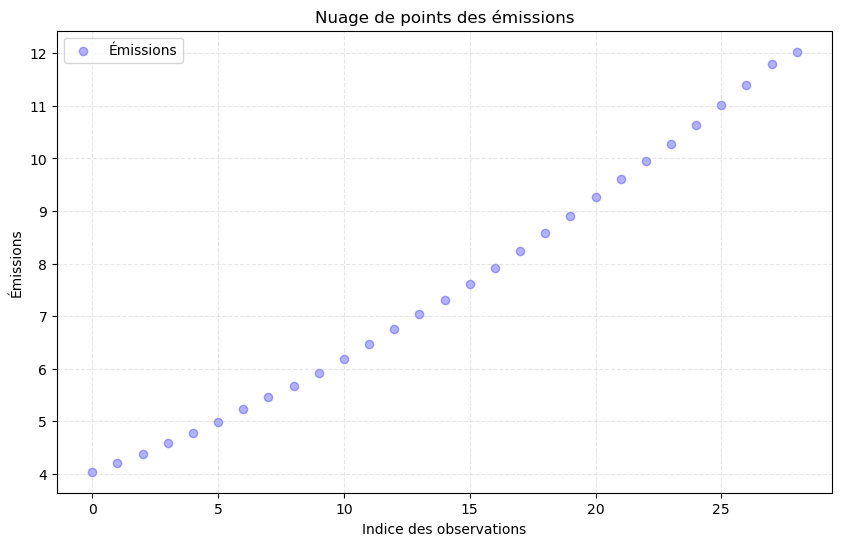

Le coefficient de corrélation est : 0.9950


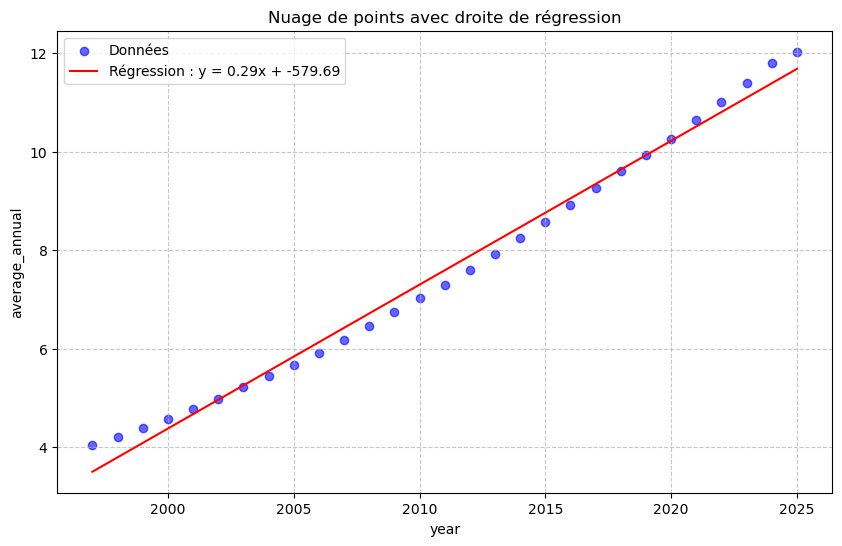

L'équation de la droite de régression est : y = 0.14x + 304.67


year  predicted_average_annual
0  2026                 11.973844
1  2027                 12.265878

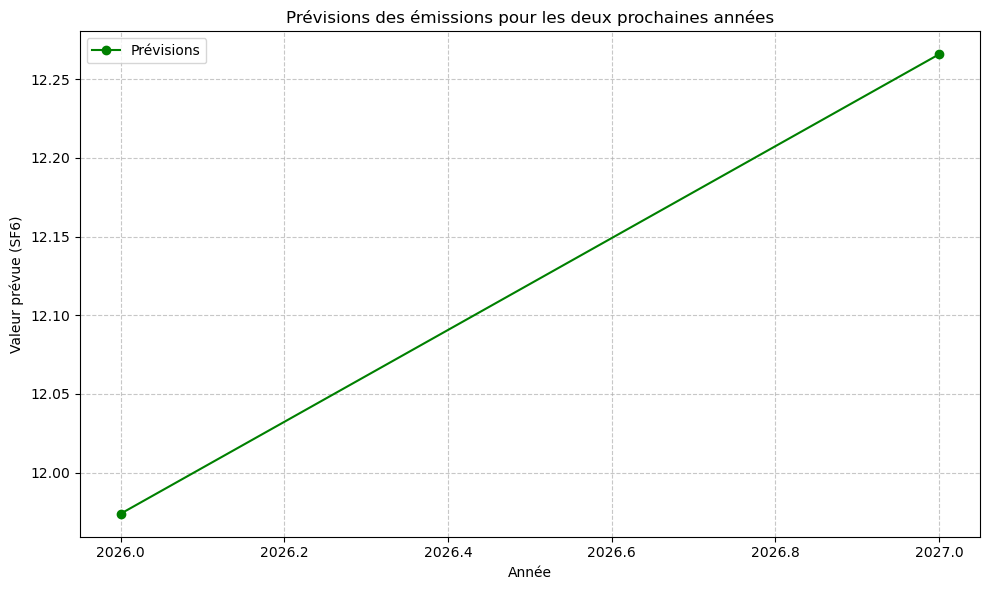

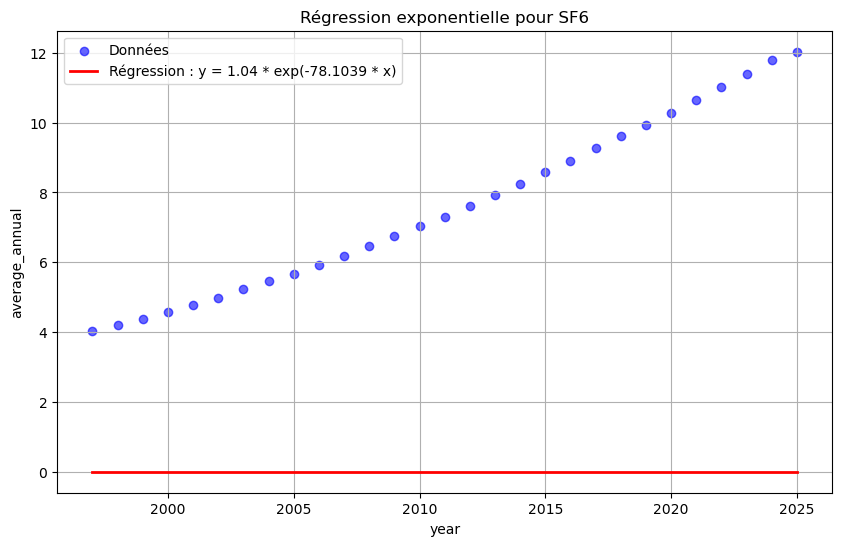

year  predicted_average_annual
0  2026                       0.0
1  2027                       0.0

{'RMSE Linéaire': np.float64(0.2447614664131288), 'RMSE Exponentiel': np.float64(7.980507016560997)}


In [63]:
df_sf6_q9 = df_sf6
dataset_annuel_sf6 = creer_dataset_annuel(df_sf6_q9)
print(dataset_annuel_sf6)
tracer_nuage_points(dataset_annuel_sf6, "average_annual")
correlation = calculer_correlation(dataset_annuel_sf6, "year", "average_annual")
print(f"Le coefficient de corrélation est : {correlation:.4f}")

a_lin, b_lin = tracer_regression_avec_nuage(dataset_annuel_sf6, "year", "average_annual")
print(f"L'équation de la droite de régression est : y = {a:.2f}x + {b:.2f}")
previsions_sf6 = prevoir_2_prochaines_annees(a_lin, b_lin, dataset_annuel_sf6)
display(previsions_sf6)
afficher_previsions_annee(previsions_sf6, "Prévisions des émissions pour les deux prochaines années", molecule="SF6")

a_exp, b_exp = regression_exponentielle(dataset_annuel_sf6, "year", "average_annual")
tracer_regression_exponentielle(dataset_annuel_sf6, "year", "average_annual", a_exp, b_exp, "Régression exponentielle pour SF6")

previsions_exp_sf6 = prevoir_exponentielle(a_exp, b_exp, dataset_annuel_sf6, "year", 2)
display(previsions_exp_sf6)

resultats_comparaison = comparer_modeles(dataset_annuel_sf6, "year", "average_annual", a_lin, b_lin, a_exp, b_exp)
print(resultats_comparaison)

## N2O

    year  average_annual
0   2001      316.363333
1   2002      316.942500
2   2003      317.634167
3   2004      318.264167
4   2005      318.915833
5   2006      319.825833
6   2007      320.445833
7   2008      321.509167
8   2009      322.280833
9   2010      323.195000
10  2011      324.215000
11  2012      325.059167
12  2013      325.951667
13  2014      327.096667
14  2015      328.177500
15  2016      328.955833
16  2017      329.746667
17  2018      330.920833
18  2019      331.885000
19  2020      333.022500
20  2021      334.287500
21  2022      335.625000
22  2023      336.697500
23  2024      337.733333
24  2025      338.420000


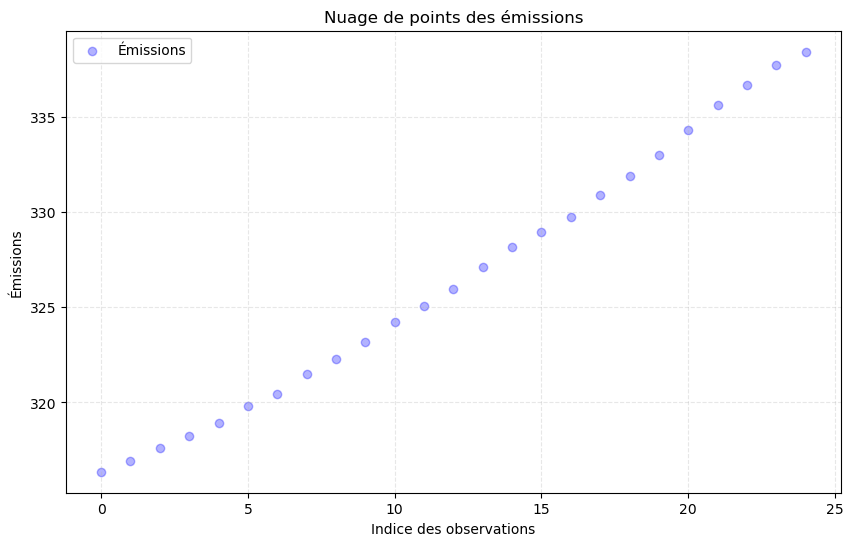

Le coefficient de corrélation est : 0.9971


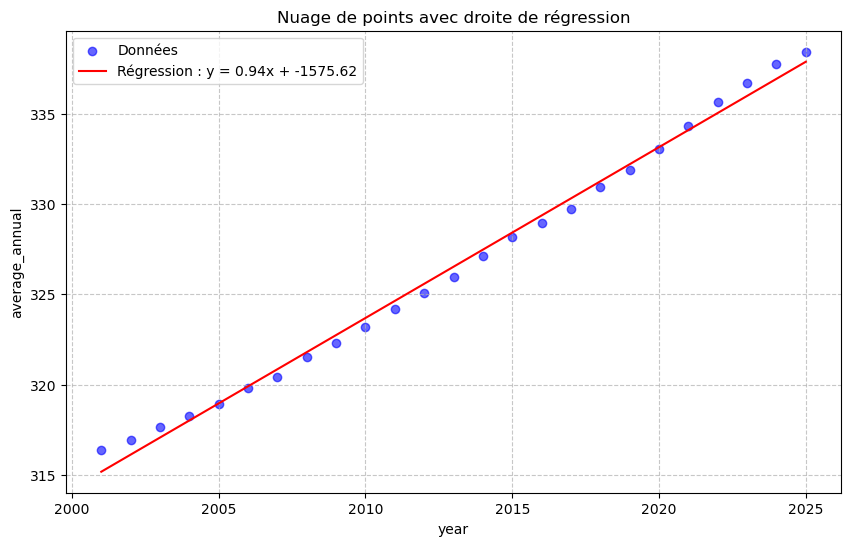

L'équation de la droite de régression est : y = 0.14x + 304.67


year  predicted_average_annual
0  2026                338.810950
1  2027                339.755882

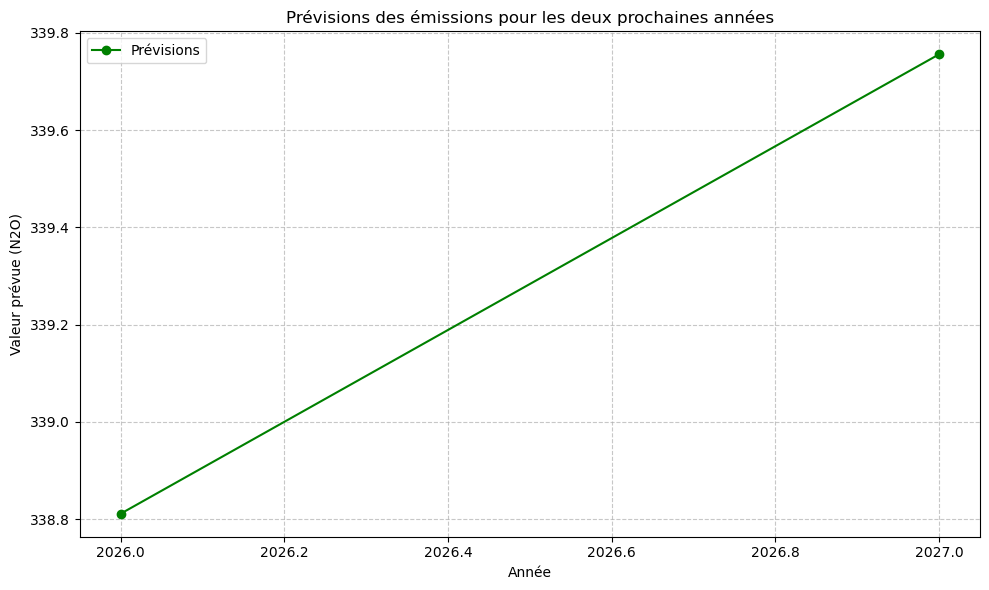

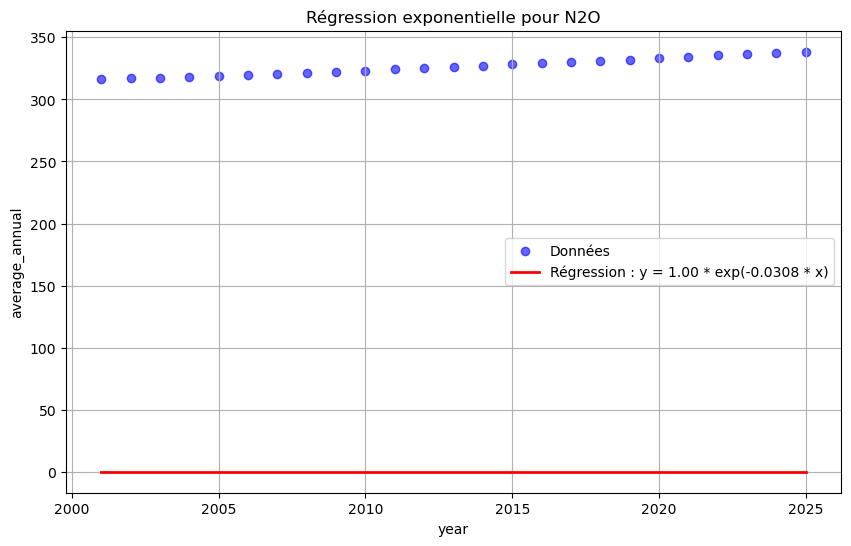

year  predicted_average_annual
0  2026              7.260802e-28
1  2027              7.040259e-28

{'RMSE Linéaire': np.float64(0.5174892740950411), 'RMSE Exponentiel': np.float64(326.59833328430096)}


In [64]:
df_n2o_q9 = df_n2o
dataset_annuel_n2o = creer_dataset_annuel(df_n2o_q9)
print(dataset_annuel_n2o)
tracer_nuage_points(dataset_annuel_n2o, "average_annual")
correlation = calculer_correlation(dataset_annuel_n2o, "year", "average_annual")
print(f"Le coefficient de corrélation est : {correlation:.4f}")

a_lin, b_lin = tracer_regression_avec_nuage(dataset_annuel_n2o, "year", "average_annual")
print(f"L'équation de la droite de régression est : y = {a:.2f}x + {b:.2f}")
previsions_n2o = prevoir_2_prochaines_annees(a_lin, b_lin, dataset_annuel_n2o)
display(previsions_n2o)
afficher_previsions_annee(previsions_n2o, "Prévisions des émissions pour les deux prochaines années", molecule="N2O")

a_exp, b_exp = regression_exponentielle(dataset_annuel_n2o, "year", "average_annual")
tracer_regression_exponentielle(dataset_annuel_n2o, "year", "average_annual", a_exp, b_exp, "Régression exponentielle pour N2O")

previsions_exp = prevoir_exponentielle(a_exp, b_exp, dataset_annuel_n2o, "year", 2)
display(previsions_exp)

resultats_comparaison = comparer_modeles(dataset_annuel_n2o, "year", "average_annual", a_lin, b_lin, a_exp, b_exp)
print(resultats_comparaison)


## CO2

    year  average_annual
0   1958      315.237000
1   1959      315.981667
2   1960      316.908333
3   1961      317.643333
4   1962      318.453333
..   ...             ...
63  2021      416.414167
64  2022      418.528333
65  2023      421.075833
66  2024      424.604167
67  2025      427.882500

[68 rows x 2 columns]


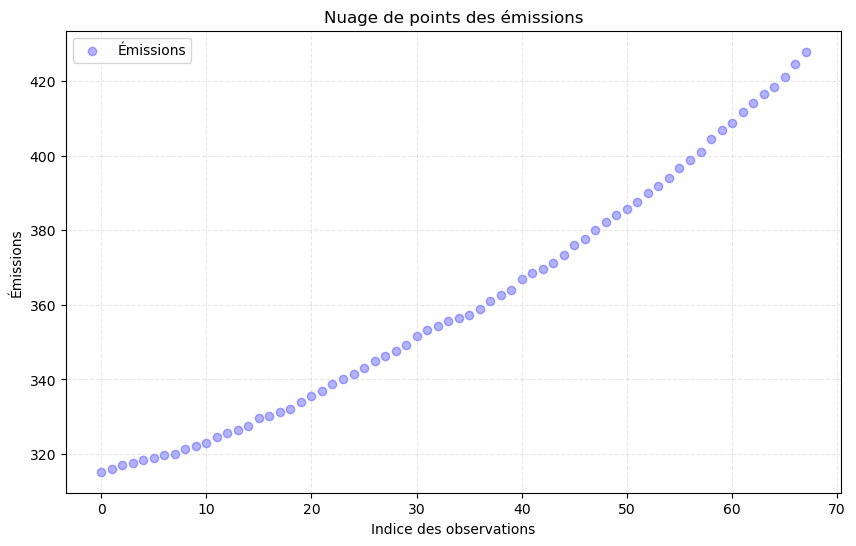

Le coefficient de corrélation est : 0.9897


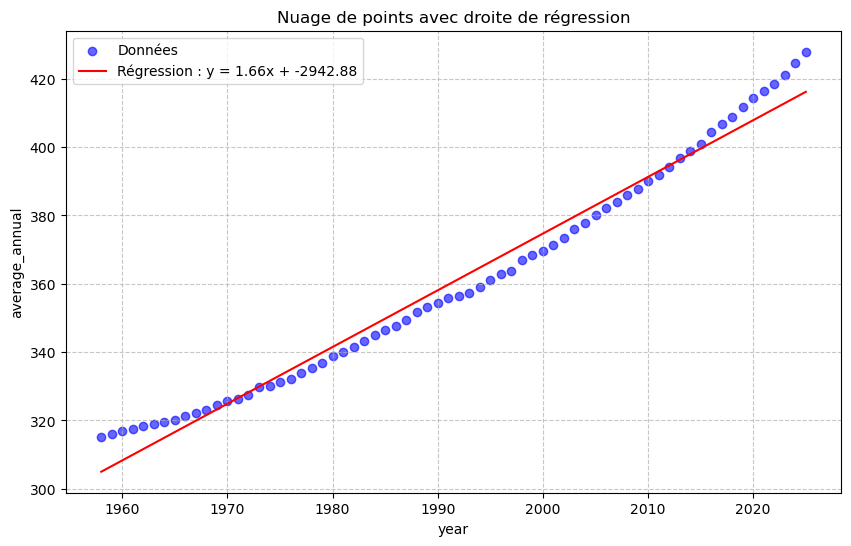

L'équation de la droite de régression est : y = 0.14x + 304.67


year  predicted_average_annual
0  2026                417.810660
1  2027                419.469442

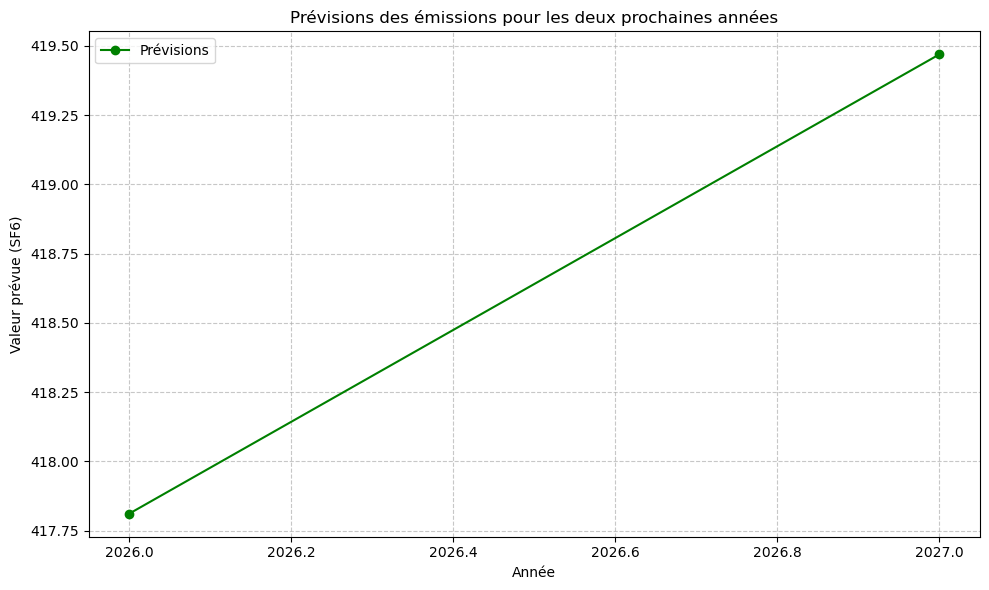

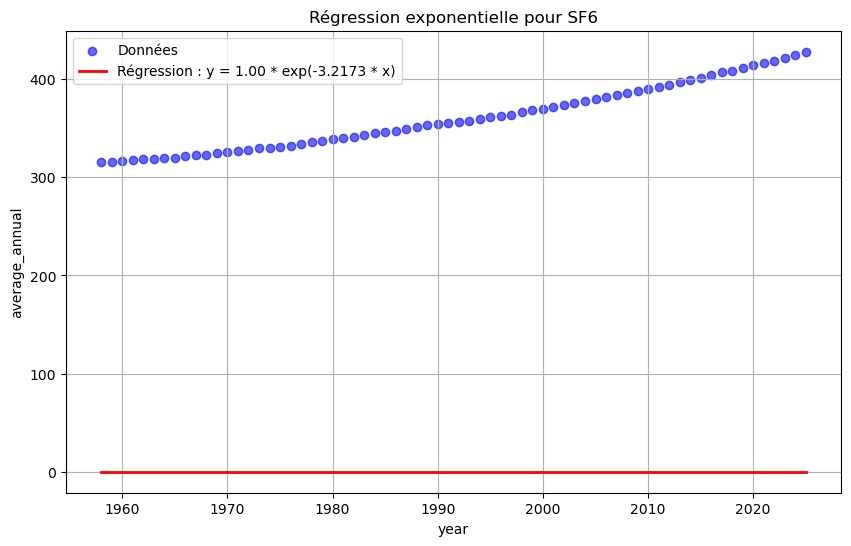

year  predicted_average_annual
0  2026                       0.0
1  2027                       0.0

{'RMSE Linéaire': np.float64(4.71479508861194), 'RMSE Exponentiel': np.float64(362.08026301270735)}


In [65]:
df_co2_q9 = df_co2
dataset_annuel_co2 = creer_dataset_annuel(df_co2_q9)
print(dataset_annuel_co2)
tracer_nuage_points(dataset_annuel_co2, "average_annual")
correlation = calculer_correlation(dataset_annuel_co2, "year", "average_annual")
print(f"Le coefficient de corrélation est : {correlation:.4f}")

a_lin, b_lin = tracer_regression_avec_nuage(dataset_annuel_co2, "year", "average_annual")
print(f"L'équation de la droite de régression est : y = {a:.2f}x + {b:.2f}")
previsions_co2 = prevoir_2_prochaines_annees(a_lin, b_lin, dataset_annuel_co2)
display(previsions_co2)
afficher_previsions_annee(previsions_co2, "Prévisions des émissions pour les deux prochaines années", molecule="SF6")

a_exp, b_exp = regression_exponentielle(dataset_annuel_co2, "year", "average_annual")
tracer_regression_exponentielle(dataset_annuel_co2, "year", "average_annual", a_exp, b_exp, "Régression exponentielle pour SF6")

previsions_exp_co2 = prevoir_exponentielle(a_exp, b_exp, dataset_annuel_co2, "year", 2)
display(previsions_exp_co2)

resultats_comparaison = comparer_modeles(dataset_annuel_co2, "year", "average_annual", a_lin, b_lin, a_exp, b_exp)
print(resultats_comparaison)